In [1]:
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
import statsmodels.api as sm
import numpy as np
import random
#from fbprophet import Prophet
import quandl
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
from matplotlib import pyplot
from pandas import Series
from math import sqrt 
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
quandl.ApiConfig.api_key = "cYf2RmzUcPBMGfsBrxhR"

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
icici = quandl.get('NSE/ICICIBANK.5',start_date='2017-01-01',end_date='2017-12-26')
bobr = quandl.get('NSE/BANKBARODA.5',start_date='2017-01-01',end_date='2017-12-26')
boi = quandl.get('NSE/BANKINDIA.5',start_date='2017-01-01',end_date='2017-12-26' )
canbk = quandl.get('NSE/CANBK.5',start_date='2017-01-01',end_date='2017-12-26' )
fedbk = quandl.get('NSE/FEDERALBNK.5',start_date='2017-01-01',end_date='2017-12-26' )
axis = quandl.get('NSE/AXISBANK.5',start_date='2017-01-01',end_date='2017-12-26' )
hdfc = quandl.get('NSE/HDFCBANK.5',start_date='2017-01-01',end_date='2017-12-26' )
indus = quandl.get('NSE/INDUSINDBK.5',start_date='2017-01-01',end_date='2017-12-26' )
kotak = quandl.get('NSE/KOTAKBANK.5' ,start_date='2017-01-01',end_date='2017-12-26')
pnb = quandl.get('NSE/PNB.5',start_date='2017-01-01',end_date='2017-12-26' )
sbin = quandl.get('NSE/SBIN.5',start_date='2017-01-01',end_date='2017-12-26' )
yesbk = quandl.get('NSE/YESBANK.5',start_date='2017-01-01',end_date='2017-12-26' )

In [3]:
d = {1:icici['Close'],2:bobr['Close'],3:boi['Close'],4:canbk['Close'],5:fedbk['Close'], 6:axis['Close'],7:hdfc['Close'],
     8:indus['Close'],9:kotak['Close'],10:pnb['Close'],11:sbin['Close'], 12:yesbk['Close']}
d1 = {'ICICI':icici['Close'], 'BOB':bobr['Close'],'BOI':boi['Close'], 'CANBK':canbk['Close'],'FEDBK':fedbk['Close'], 
     'AXIS':axis['Close'],'HDFC':hdfc['Close'],'INDUSIND':indus['Close'],'KOTAK':kotak['Close'], 'PNB':pnb['Close'],
     'SBI':sbin['Close'], 'YESBANK':yesbk['Close']}
df = pd.DataFrame(data=d)
df1 = pd.DataFrame(data=d1)

In [4]:
x=[]
for i in df1.columns:
    x.append(i)
print(x)

['AXIS', 'BOB', 'BOI', 'CANBK', 'FEDBK', 'HDFC', 'ICICI', 'INDUSIND', 'KOTAK', 'PNB', 'SBI', 'YESBANK']


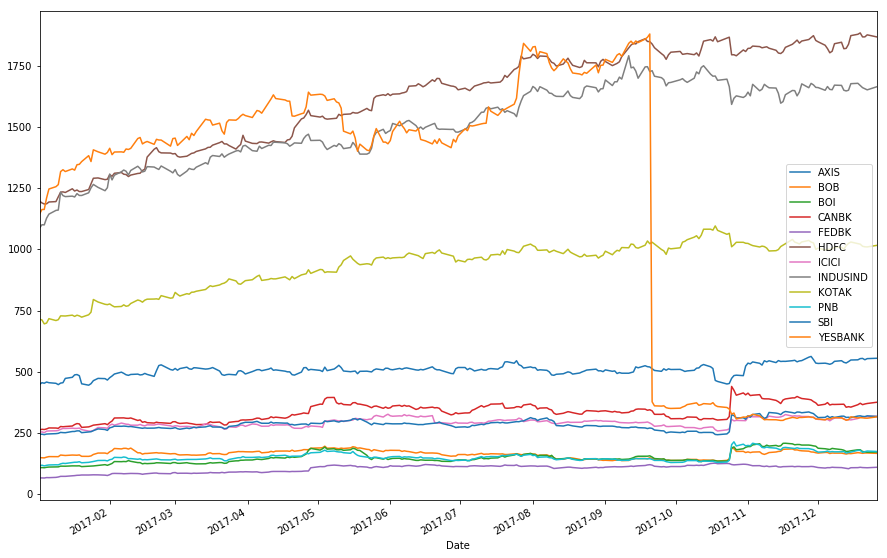

In [5]:
keys=[]
keys=df1.keys()
for i in range(len(df1.columns)):
    df1[keys[i]].plot()
pyplot.xlim([df1.index[0],df1.index[-1]])
pyplot.legend(loc="best")
pyplot.show()

In [6]:
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

# AR MODEL

In [7]:
def autoreg(ar):
    global ar_mse
    size = int(len(ar)/2)
    ar_train, ar_test = ar[0:size], ar[size:]
    ar_history = [ar for ar in ar_train]
    ar_predictions = list()
    for t in range(len(ar_test)):
        ar_model = ARMA(ar_history, order=(1,0))
        ar_model_fit = ar_model.fit(trend='nc', disp=0)
        ar_coef = ar_model_fit.arparams
        ar_yhat = predict(ar_coef, ar_history)
        ar_predictions.append(ar_yhat)
        ar_obs = ar_test[t]
        ar_history.append(ar_obs)
        print('>predicted=%.3f, expected=%.3f' % (ar_yhat, ar_obs))
    ar_mse=mean_squared_error(ar_test, ar_predictions)
    print('Test Root Mean Squared Error: %.3f' % sqrt(ar_mse))
    print(ar_model_fit.summary())
    pyplot.plot(ar.index[len(ar_test)-1:],ar_test, color='black',label='test')
    pyplot.plot(ar.index[len(ar_test)-1:],ar_predictions, color='red',label='predictions')
    pyplot.legend(loc='best')
    pyplot.title('Auto Rergression Model')
    pyplot.show()
    return autoreg

# MA MODEL

In [8]:
def movavg(ma):
    global ma_mse
    size = int(len(ma)/2)
    ma_train, ma_test = ma[0:size], ma[size:]
    ma_history = [ma for ma in ma_train]
    ma_predictions = list()
    for t in range(len(ma_test)):
        ma_model = ARMA(ma_history, order=(0,1))
        ma_model_fit = ma_model.fit(trend='nc', disp=False)
        ma_coef = ma_model_fit.maparams
        ma_yhat = predict(ma_coef, ma_history)
        ma_predictions.append(ma_yhat)
        ma_obs = ma_test[t]
        ma_history.append(ma_obs)
        print('>predicted=%.3f, expected=%.3f' % (ma_yhat, ma_obs))
    ma_mse = mean_squared_error(ma_test, ma_predictions)
    print('Test Root Mean Squared Error: %.3f' % sqrt(ma_mse))
    print(ma_model_fit.summary())
    pyplot.plot(icici.index[len(ma_test)-1:],ma_test, color='black',label='test')
    pyplot.plot(icici.index[len(ma_test)-1:],ma_predictions, color='red',label='predictions')
    pyplot.legend(loc='best')
    pyplot.title('Moving Average Model')
    pyplot.show()
    return movavg

# ARMA MODEL

In [9]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

In [12]:
def armamod(arma):
    global arma_mse
    arma_size = int(len(arma)/2)
    arma_train, arma_test = arma[0:arma_size], arma[arma_size:]
    arma_history = [arma for arma in arma_train]
    arma_predictions = list()
    for t in range(len(arma_test)):
        arma_model = ARMA(arma_history, order=(1,0))
        arma_model_fit = arma_model.fit(disp=0)
        ar_coef = arma_model_fit.arparams
        ma_coef = arma_model_fit.maparams
        arma_resid = arma_model_fit.resid
        arma_diff = difference(arma_history)
        arma_yhat = predict(ar_coef, arma_history)+predict(ma_coef, arma_diff)
        arma_predictions.append(arma_yhat)
        arma_obs = arma_test[t]
        arma_history.append(arma_obs)
        print('>predicted=%.3f, expected=%.3f' % (arma_yhat, arma_obs))
    arma_mse = mean_squared_error(arma_test, arma_predictions)
    print('Test Root Mean Squared Error: %.3f' % sqrt(arma_mse))
    print(arma_model_fit.summary())
    pyplot.plot(icici.index[len(arma_test)-1:],arma_test, color='black',label='test')
    pyplot.plot(icici.index[len(arma_test)-1:],arma_predictions, color='red',label='predictions')
    pyplot.legend(loc='best')
    pyplot.title('ARMA Model')
    pyplot.show()
    return armamod

# ARIMA MODEL

In [10]:
def arimamod(arima):
    global arima_mse
    arima_size = int(len(arima)/2)
    arima_train, arima_test = arima[0:arima_size], arima[arima_size:]
    arima_history = [arima for arima in arima_train]
    arima_predictions = list()
    for t in range(len(arima_test)):
        arima_model = ARIMA(arima_history, order=(1,1,0))
        arima_model_fit = arima_model.fit(disp=0)
        ar_coef= arima_model_fit.arparams
        ma_coef = arima_model_fit.maparams
        arima_resid = arima_model_fit.resid
        arima_diff = difference(arima_history)
        arima_yhat = arima_history[-1]+ predict(ar_coef, arima_diff) + predict(ma_coef, arima_resid)
        arima_predictions.append(arima_yhat)
        arima_obs = arima_test[t]
        arima_history.append(arima_obs)
        print('>predicted=%.3f, expected=%.3f' % (arima_yhat, arima_obs))
    arima_mse = mean_squared_error(arima_test, arima_predictions)
    print('Test Root Mean Squared Error: %.3f' % sqrt(arima_mse))
    print(arima_model_fit.summary())
    pyplot.plot(icici.index[len(arima_test)-1:],arima_test, color='black',label='test')
    pyplot.plot(icici.index[len(arima_test)-1:],arima_predictions, color='red',label='predictions')
    pyplot.legend(loc='best')
    pyplot.title('ARIMA Model')
    pyplot.show()
    return arimamod

>predicted=512.024, expected=517.350
>predicted=517.274, expected=517.250
>predicted=517.250, expected=508.400
>predicted=508.400, expected=513.900
>predicted=513.825, expected=509.500
>predicted=509.426, expected=503.150
>predicted=503.150, expected=509.950
>predicted=509.950, expected=506.800
>predicted=506.800, expected=506.750
>predicted=506.677, expected=511.900
>predicted=511.900, expected=512.950
>predicted=512.950, expected=510.500


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


>predicted=510.500, expected=516.550
>predicted=516.479, expected=520.200
>predicted=520.200, expected=540.000
>predicted=539.927, expected=540.800
>predicted=540.800, expected=534.800
>predicted=534.800, expected=544.950
>predicted=544.950, expected=528.850
>predicted=528.776, expected=524.650
>predicted=524.650, expected=515.100
>predicted=515.100, expected=519.800
>predicted=519.800, expected=516.550
>predicted=516.476, expected=516.900
>predicted=516.827, expected=506.000
>predicted=505.926, expected=508.100
>predicted=508.100, expected=505.800
>predicted=505.800, expected=499.450
>predicted=499.377, expected=486.950
>predicted=486.950, expected=485.500
>predicted=485.427, expected=489.700
>predicted=489.700, expected=491.750
>predicted=491.750, expected=499.500
>predicted=499.428, expected=497.150
>predicted=497.078, expected=490.400
>predicted=490.400, expected=494.800
>predicted=494.800, expected=499.200
>predicted=499.129, expected=502.650
>predicted=502.580, expected=506.850
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning

>predicted=545.564, expected=542.000
>predicted=541.914, expected=542.600
>predicted=542.514, expected=542.400
>predicted=542.315, expected=545.150
>predicted=545.150, expected=546.800
>predicted=546.715, expected=540.500
>predicted=540.500, expected=544.150
>predicted=544.066, expected=545.500
>predicted=545.500, expected=559.400
>predicted=559.316, expected=562.550
>predicted=562.466, expected=549.500
>predicted=549.500, expected=535.400
>predicted=535.315, expected=533.850
>predicted=533.765, expected=534.950
>predicted=534.950, expected=533.150
>predicted=533.150, expected=530.500
>predicted=530.416, expected=534.050
>predicted=533.966, expected=542.500
>predicted=542.500, expected=545.100
>predicted=545.100, expected=538.600
>predicted=538.600, expected=535.750
>predicted=535.750, expected=541.450
>predicted=541.450, expected=547.950
>predicted=547.950, expected=548.650
>predicted=548.568, expected=553.650
>predicted=553.650, expected=554.500
>predicted=554.500, expected=548.950
>

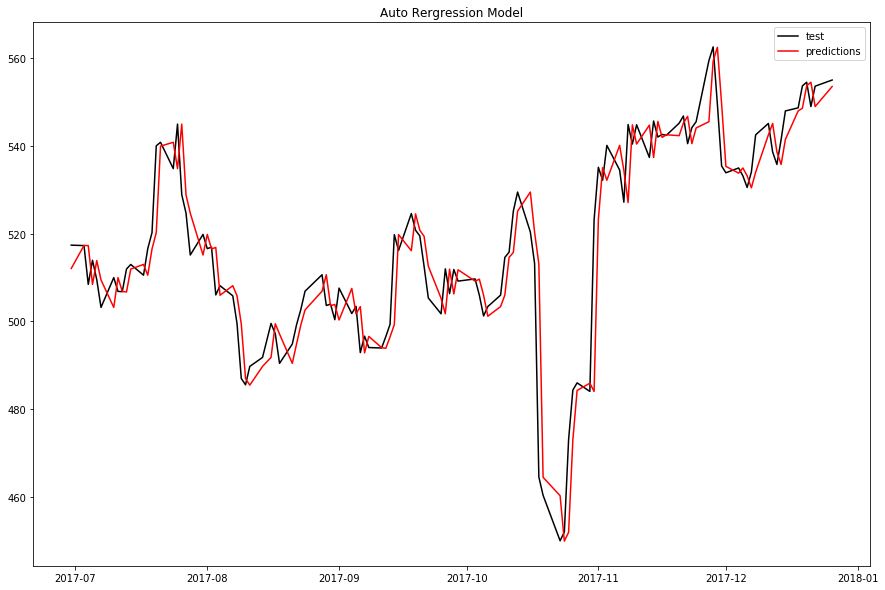

>predicted=512.069, expected=517.350
>predicted=517.324, expected=517.250
>predicted=517.237, expected=508.400
>predicted=508.374, expected=513.900
>predicted=513.877, expected=509.500
>predicted=509.500, expected=503.150
>predicted=503.147, expected=509.950


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=509.928, expected=506.800
>predicted=506.774, expected=506.750
>predicted=506.730, expected=511.900
>predicted=511.900, expected=512.950
>predicted=512.936, expected=510.500
>predicted=510.479, expected=516.550
>predicted=516.525, expected=520.200
>predicted=520.174, expected=540.000
>predicted=539.975, expected=540.800
>predicted=540.779, expected=534.800
>predicted=534.788, expected=544.950
>predicted=544.917, expected=528.850
>predicted=528.845, expected=524.650
>predicted=524.621, expected=515.100
>predicted=515.068, expected=519.800
>predicted=519.770, expected=516.550
>predicted=516.513, expected=516.900
>predicted=516.889, expected=506.000
>predicted=505.999, expected=508.100
>predicted=508.091, expected=505.800
>predicted=505.775, expected=499.450
>predicted=499.407, expected=486.950
>predicted=486.949, expected=485.500
>predicted=485.465, expected=489.700
>predicted=489.700, expected=491.750
>predicted=491.728, expected=499.500
>predicted=499.477, expected=497.150
>

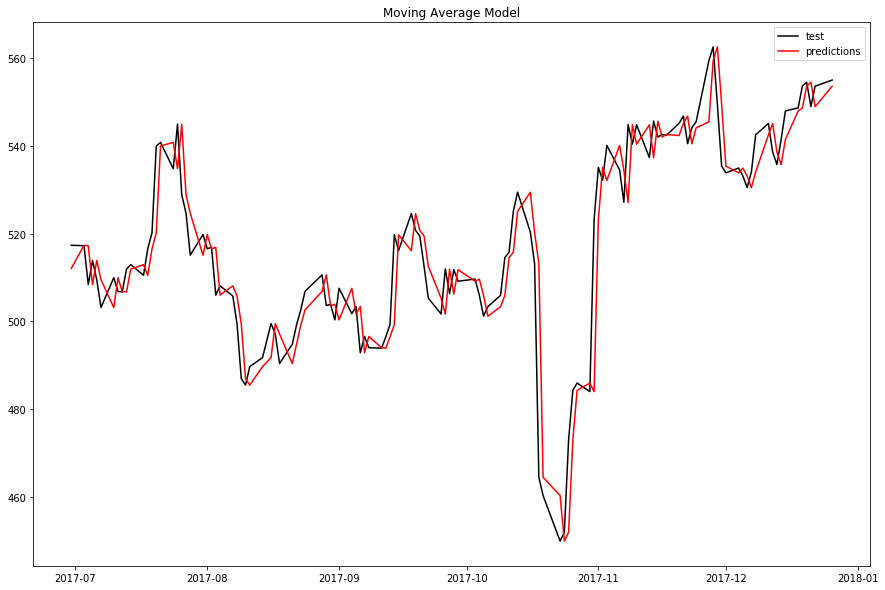

>predicted=473.662, expected=517.350
>predicted=479.574, expected=517.250
>predicted=479.840, expected=508.400
>predicted=470.182, expected=513.900
>predicted=476.025, expected=509.500
>predicted=471.484, expected=503.150
>predicted=465.001, expected=509.950
>predicted=471.718, expected=506.800
>predicted=468.587, expected=506.750
>predicted=468.651, expected=511.900
>predicted=473.974, expected=512.950
>predicted=475.296, expected=510.500
>predicted=472.885, expected=516.550
>predicted=479.383, expected=520.200
>predicted=483.721, expected=540.000
>predicted=506.573, expected=540.800
>predicted=508.676, expected=534.800
>predicted=501.748, expected=544.950
>predicted=515.156, expected=528.850
>predicted=494.691, expected=524.650
>predicted=490.249, expected=515.100
>predicted=479.732, expected=519.800
>predicted=484.870, expected=516.550
>predicted=481.578, expected=516.900
>predicted=482.149, expected=506.000
>predicted=470.690, expected=508.100
>predicted=472.791, expected=505.800
>

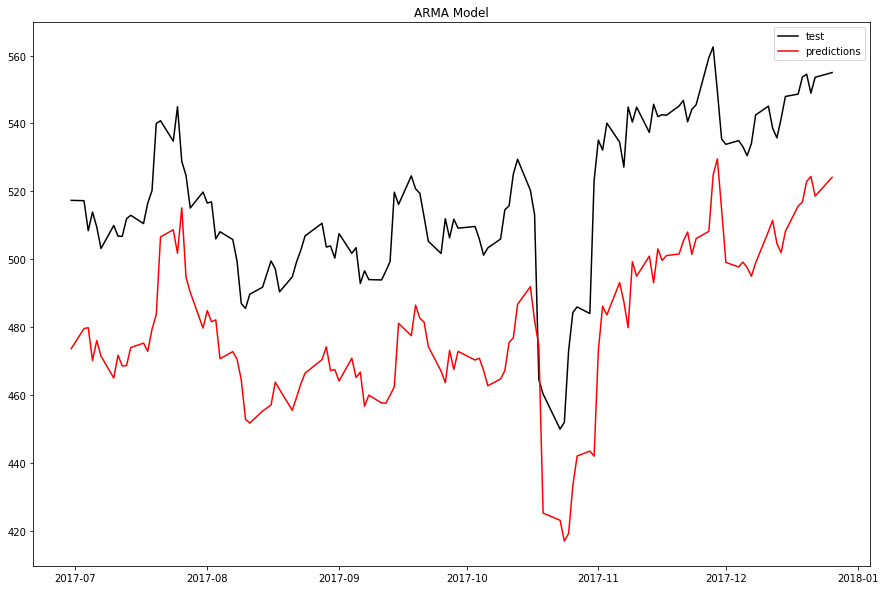

>predicted=514.481, expected=517.350
>predicted=518.001, expected=517.250
>predicted=517.238, expected=508.400
>predicted=507.302, expected=513.900
>predicted=514.545, expected=509.500
>predicted=508.999, expected=503.150
>predicted=502.404, expected=509.950
>predicted=510.711, expected=506.800
>predicted=506.458, expected=506.750
>predicted=506.745, expected=511.900
>predicted=512.459, expected=512.950
>predicted=513.064, expected=510.500
>predicted=510.235, expected=516.550
>predicted=517.193, expected=520.200
>predicted=520.594, expected=540.000
>predicted=542.274, expected=540.800
>predicted=540.888, expected=534.800
>predicted=534.138, expected=544.950
>predicted=545.994, expected=528.850
>predicted=527.492, expected=524.650
>predicted=524.271, expected=515.100
>predicted=514.192, expected=519.800
>predicted=520.222, expected=516.550
>predicted=516.264, expected=516.900
>predicted=516.931, expected=506.000
>predicted=505.042, expected=508.100
>predicted=508.278, expected=505.800
>

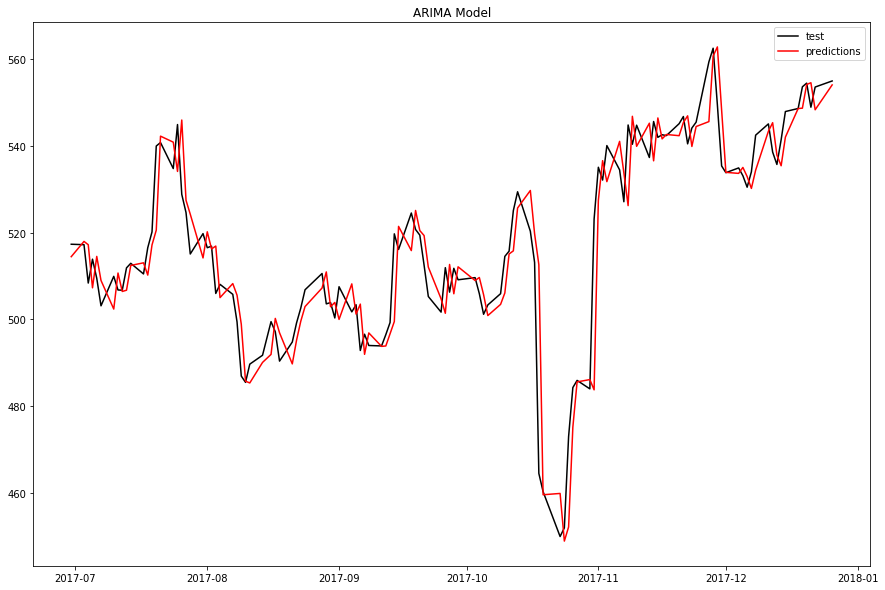

>predicted=155.455, expected=161.650
>predicted=161.605, expected=161.850
>predicted=161.805, expected=159.350
>predicted=159.305, expected=160.800
>predicted=160.800, expected=162.400
>predicted=162.400, expected=160.550
>predicted=160.506, expected=166.600
>predicted=166.600, expected=162.650
>predicted=162.605, expected=163.500
>predicted=163.500, expected=163.400
>predicted=163.356, expected=165.000
>predicted=165.000, expected=164.350
>predicted=164.307, expected=163.850
>predicted=163.807, expected=164.450
>predicted=164.407, expected=161.900
>predicted=161.857, expected=161.750
>predicted=161.708, expected=164.200
>predicted=164.200, expected=165.000
>predicted=164.958, expected=163.350
>predicted=163.308, expected=160.950
>predicted=160.909, expected=161.550
>predicted=161.509, expected=166.050
>predicted=166.009, expected=163.500
>predicted=163.500, expected=163.400
>predicted=163.359, expected=158.200
>predicted=158.159, expected=158.950
>predicted=158.909, expected=160.050
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=138.462, expected=138.550
>predicted=138.512, expected=137.600
>predicted=137.563, expected=137.300
>predicted=137.263, expected=137.550
>predicted=137.513, expected=139.600
>predicted=139.563, expected=141.800
>predicted=141.763, expected=141.550
>predicted=141.513, expected=141.650
>predicted=141.613, expected=138.600
>predicted=138.564, expected=138.550
>predicted=138.514, expected=139.550
>predicted=139.514, expected=138.200
>predicted=138.164, expected=139.150
>predicted=139.114, expected=136.700
>predicted=136.664, expected=134.900
>predicted=134.865, expected=137.900
>predicted=137.865, expected=143.150
>predicted=143.114, expected=188.150
>predicted=188.150, expected=185.700
>predicted=185.700, expected=174.400


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=174.329, expected=174.650
>predicted=174.580, expected=169.900
>predicted=169.830, expected=172.450
>predicted=172.450, expected=169.550
>predicted=169.550, expected=171.750
>predicted=171.680, expected=172.600
>predicted=172.531, expected=165.250
>predicted=165.180, expected=162.300
>predicted=162.230, expected=165.550
>predicted=165.481, expected=169.800
>predicted=169.731, expected=172.100
>predicted=172.031, expected=174.350
>predicted=174.281, expected=175.200
>predicted=175.132, expected=182.800
>predicted=182.800, expected=183.550
>predicted=183.550, expected=184.450
>predicted=184.450, expected=180.350
>predicted=180.282, expected=180.650
>predicted=180.582, expected=178.100
>predicted=178.032, expected=176.850
>predicted=176.782, expected=175.400
>predicted=175.333, expected=172.250
>predicted=172.183, expected=171.650
>predicted=171.583, expected=169.100
>predicted=169.033, expected=167.600
>predicted=167.534, expected=170.100
>predicted=170.100, expected=170.000
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=165.884, expected=167.950
>predicted=167.884, expected=167.450
>predicted=167.385, expected=167.450
>predicted=167.385, expected=165.600
>predicted=165.535, expected=163.750
>predicted=163.685, expected=165.850
>predicted=165.786, expected=165.250
>predicted=165.186, expected=169.400
>predicted=169.336, expected=168.300
>predicted=168.236, expected=166.650
>predicted=166.586, expected=167.900
>predicted=167.837, expected=168.000
>predicted=167.937, expected=166.500
Test Root Mean Squared Error: 4.949
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(1, 0)   Log Likelihood                -709.502
Method:                       css-mle   S.D. of innovations              4.367
Date:                Mon, 22 Jan 2018   AIC                           1423.004
Time:                        10:13:24   BIC                           1429.998
Sample:  

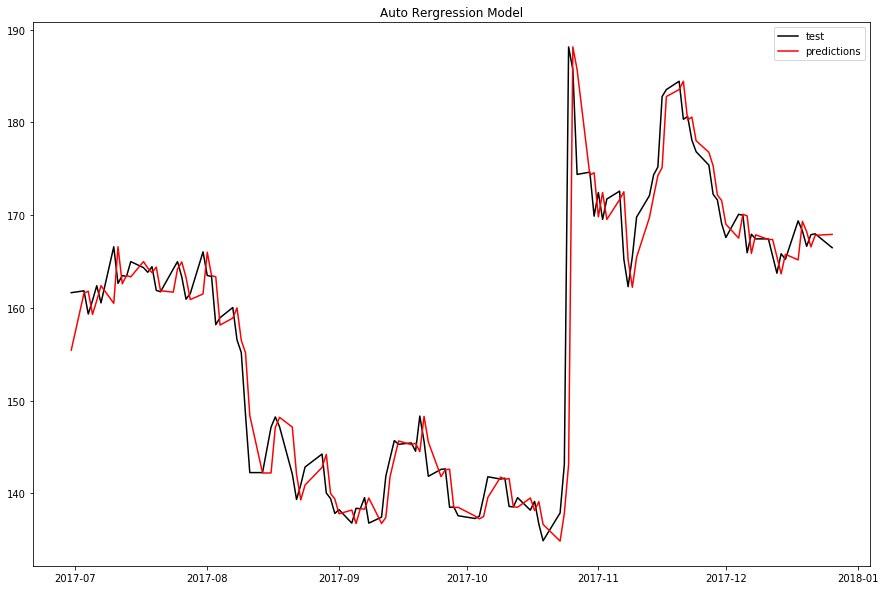

>predicted=155.488, expected=161.650
>predicted=161.647, expected=161.850
>predicted=161.848, expected=159.350
>predicted=159.341, expected=160.800
>predicted=160.800, expected=162.400
>predicted=162.392, expected=160.550
>predicted=160.544, expected=166.600
>predicted=166.599, expected=162.650
>predicted=162.641, expected=163.500
>predicted=163.486, expected=163.400
>predicted=163.391, expected=165.000
>predicted=164.994, expected=164.350
>predicted=164.348, expected=163.850
>predicted=163.849, expected=164.450
>predicted=164.441, expected=161.900
>predicted=161.886, expected=161.750
>predicted=161.744, expected=164.200
>predicted=164.199, expected=165.000
>predicted=164.991, expected=163.350
>predicted=163.350, expected=160.950
>predicted=160.944, expected=161.550
>predicted=161.549, expected=166.050
>predicted=166.047, expected=163.500
>predicted=163.485, expected=163.400
>predicted=163.399, expected=158.200
>predicted=158.188, expected=158.950
>predicted=158.946, expected=160.050
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=138.246, expected=136.800
>predicted=136.795, expected=138.400
>predicted=138.393, expected=138.350
>predicted=138.341, expected=139.550
>predicted=139.550, expected=136.800
>predicted=136.795, expected=137.450
>predicted=137.446, expected=141.850
>predicted=141.844, expected=143.800
>predicted=143.796, expected=145.700
>predicted=145.696, expected=145.300
>predicted=145.292, expected=145.450
>predicted=145.450, expected=144.550
>predicted=144.534, expected=148.350
>predicted=148.339, expected=145.600
>predicted=145.590, expected=141.850
>predicted=141.845, expected=142.600
>predicted=142.593, expected=142.650
>predicted=142.643, expected=138.500
>predicted=138.490, expected=138.550
>predicted=138.541, expected=137.600
>predicted=137.597, expected=137.300
>predicted=137.286, expected=137.550
>predicted=137.548, expected=139.600
>predicted=139.589, expected=141.800
>predicted=141.797, expected=141.550
>predicted=141.545, expected=141.650
>predicted=141.646, expected=138.600
>

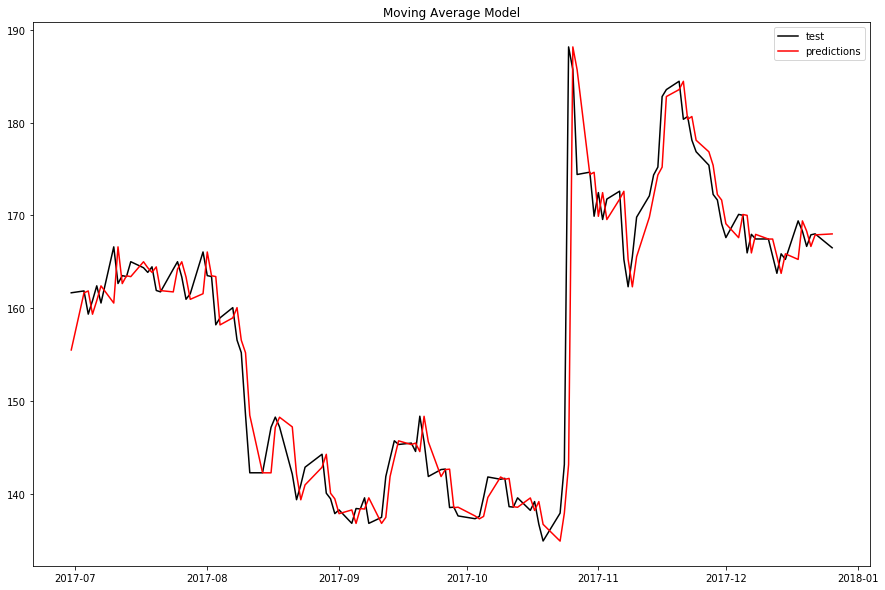

>predicted=148.868, expected=161.650
>predicted=154.025, expected=161.850
>predicted=154.230, expected=159.350
>predicted=152.045, expected=160.800
>predicted=153.336, expected=162.400
>predicted=154.765, expected=160.550
>predicted=153.140, expected=166.600
>predicted=158.413, expected=162.650
>predicted=154.773, expected=163.500
>predicted=155.550, expected=163.400
>predicted=155.479, expected=165.000
>predicted=156.928, expected=164.350
>predicted=156.350, expected=163.850
>predicted=155.913, expected=164.450
>predicted=156.470, expected=161.900
>predicted=154.167, expected=161.750
>predicted=154.057, expected=164.200
>predicted=156.246, expected=165.000
>predicted=156.983, expected=163.350
>predicted=155.488, expected=160.950
>predicted=153.338, expected=161.550
>predicted=153.894, expected=166.050
>predicted=157.887, expected=163.500
>predicted=155.539, expected=163.400
>predicted=155.465, expected=158.200
>predicted=150.762, expected=158.950
>predicted=151.451, expected=160.050
>

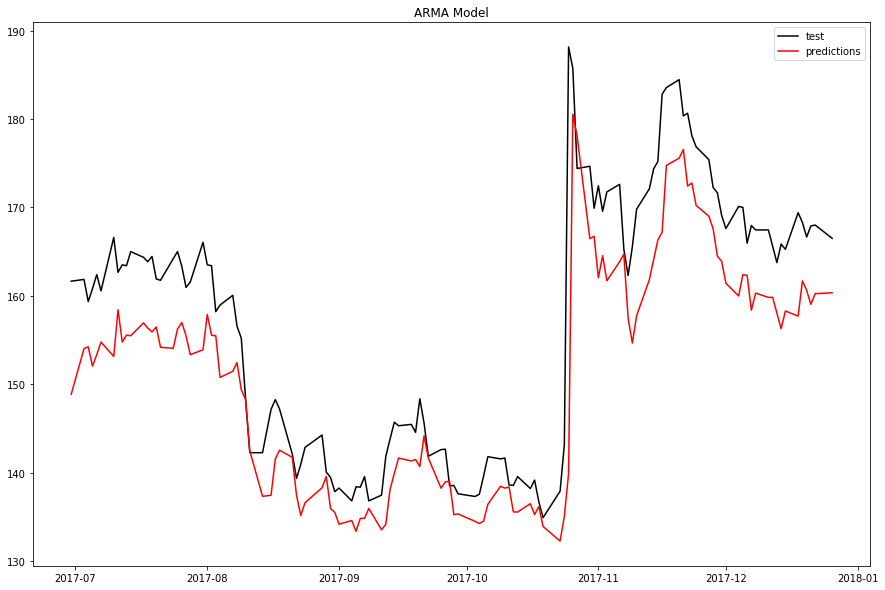

>predicted=155.509, expected=161.650
>predicted=161.066, expected=161.850
>predicted=161.831, expected=159.350
>predicted=159.582, expected=160.800
>predicted=160.663, expected=162.400
>predicted=162.251, expected=160.550
>predicted=160.725, expected=166.600
>predicted=165.986, expected=162.650
>predicted=163.098, expected=163.500
>predicted=163.403, expected=163.400
>predicted=163.411, expected=165.000
>predicted=164.817, expected=164.350
>predicted=164.425, expected=163.850
>predicted=163.907, expected=164.450
>predicted=164.381, expected=161.900
>predicted=162.194, expected=161.750
>predicted=161.767, expected=164.200
>predicted=163.919, expected=165.000
>predicted=164.909, expected=163.350
>predicted=163.538, expected=160.950
>predicted=161.218, expected=161.550
>predicted=161.483, expected=166.050
>predicted=165.552, expected=163.500
>predicted=163.796, expected=163.400
>predicted=163.412, expected=158.200
>predicted=158.796, expected=158.950
>predicted=158.864, expected=160.050
>

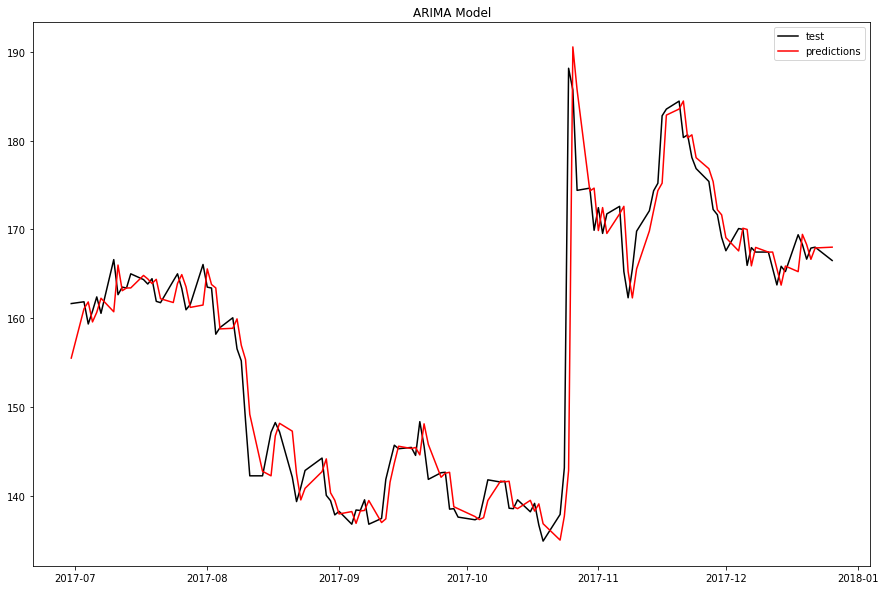

>predicted=138.380, expected=139.700
>predicted=139.630, expected=139.700
>predicted=139.700, expected=137.000
>predicted=136.931, expected=137.650
>predicted=137.650, expected=140.450
>predicted=140.382, expected=141.200
>predicted=141.133, expected=149.200
>predicted=149.200, expected=144.400
>predicted=144.400, expected=145.300
>predicted=145.232, expected=144.350
>predicted=144.350, expected=146.950
>predicted=146.950, expected=148.100
>predicted=148.033, expected=152.650
>predicted=152.650, expected=155.950
>predicted=155.884, expected=151.250
>predicted=151.183, expected=154.900
>predicted=154.834, expected=159.800
>predicted=159.800, expected=163.950
>predicted=163.950, expected=160.600
>predicted=160.600, expected=154.900
>predicted=154.900, expected=162.250
>predicted=162.250, expected=166.000
>predicted=166.000, expected=162.300
>predicted=162.233, expected=161.550
>predicted=161.483, expected=154.750
>predicted=154.681, expected=158.450
>predicted=158.450, expected=158.050
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



>predicted=191.100, expected=194.150
>predicted=194.046, expected=194.250
>predicted=194.146, expected=201.100
>predicted=200.998, expected=205.650
>predicted=205.549, expected=195.150
>predicted=195.150, expected=193.900
>predicted=193.900, expected=200.050
>predicted=199.946, expected=196.350
>predicted=196.246, expected=199.000
>predicted=198.897, expected=195.600
>predicted=195.496, expected=197.400
>predicted=197.297, expected=207.500
>predicted=207.500, expected=207.850
>predicted=207.749, expected=205.300
>predicted=205.198, expected=201.500
>predicted=201.398, expected=202.650
>predicted=202.548, expected=202.600
>predicted=202.499, expected=200.400
>predicted=200.400, expected=200.400
>predicted=200.299, expected=199.150
>predicted=199.049, expected=197.100
>predicted=196.999, expected=195.650
>predicted=195.550, expected=187.350
>predicted=187.350, expected=185.300
>predicted=185.197, expected=184.000
>predicted=183.897, expected=182.300
>predicted=182.300, expected=186.750


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=186.750, expected=185.250
>predicted=185.250, expected=181.900
>predicted=181.798, expected=179.400
>predicted=179.400, expected=174.100
>predicted=173.997, expected=174.950
>predicted=174.950, expected=176.950
>predicted=176.950, expected=181.050
>predicted=181.050, expected=181.250
>predicted=181.150, expected=174.100
>predicted=173.998, expected=172.700
>predicted=172.599, expected=171.150
>predicted=171.049, expected=171.750
Test Root Mean Squared Error: 5.739
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(1, 0)   Log Likelihood                -740.149
Method:                       css-mle   S.D. of innovations              4.956
Date:                Mon, 22 Jan 2018   AIC                           1484.299
Time:                        10:13:39   BIC                           1491.293
Sample:                             0   HQIC  

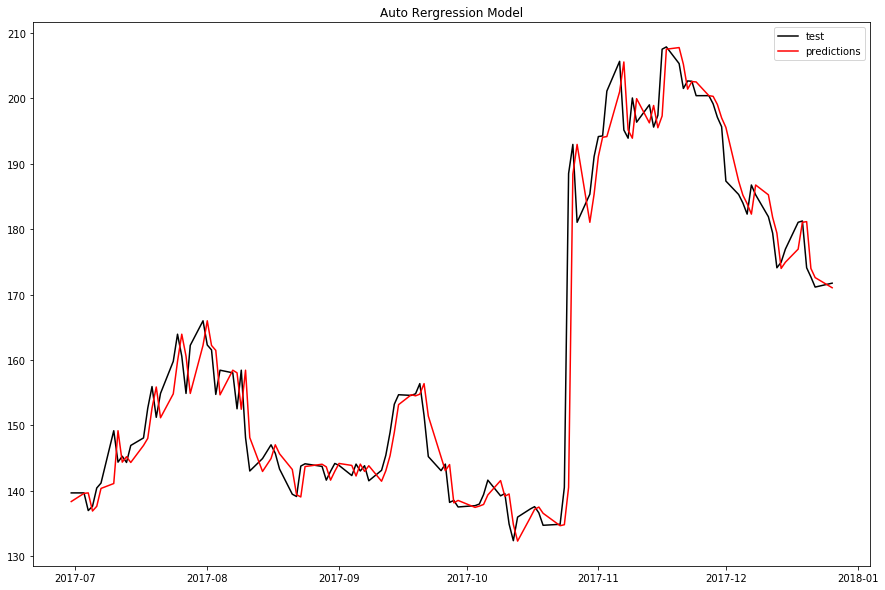

>predicted=138.446, expected=139.700
>predicted=139.693, expected=139.700
>predicted=139.695, expected=137.000
>predicted=136.990, expected=137.650
>predicted=137.645, expected=140.450
>predicted=140.443, expected=141.200
>predicted=141.187, expected=149.200
>predicted=149.195, expected=144.400
>predicted=144.386, expected=145.300
>predicted=145.296, expected=144.350
>predicted=144.345, expected=146.950
>predicted=146.949, expected=148.100
>predicted=148.090, expected=152.650
>predicted=152.639, expected=155.950
>predicted=155.948, expected=151.250
>predicted=151.244, expected=154.900
>predicted=154.899, expected=159.800
>predicted=159.789, expected=163.950
>predicted=163.950, expected=160.600
>predicted=160.590, expected=154.900
>predicted=154.897, expected=162.250
>predicted=162.245, expected=166.000
>predicted=165.992, expected=162.300
>predicted=162.292, expected=161.550
>predicted=161.539, expected=154.750
>predicted=154.748, expected=158.450
>predicted=158.439, expected=158.050
>

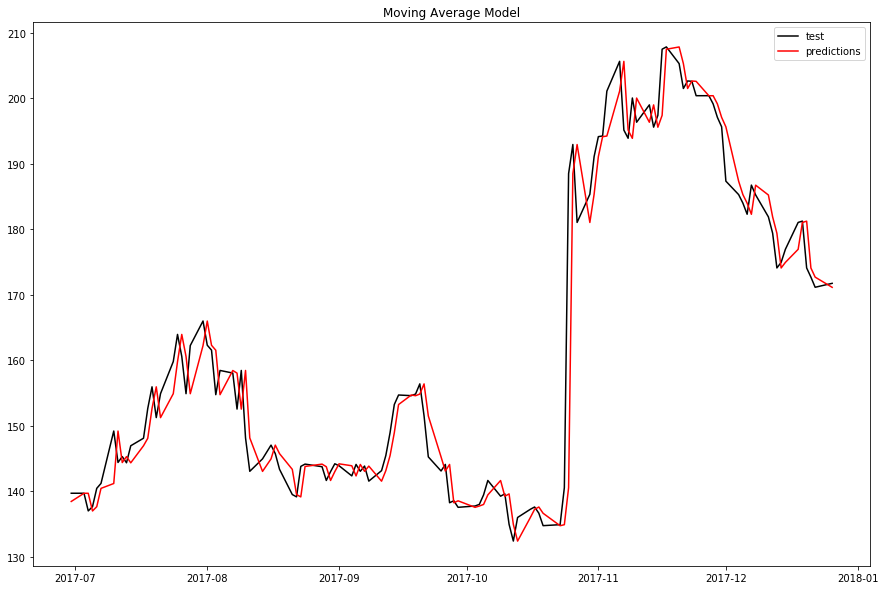

>predicted=135.941, expected=139.700
>predicted=137.181, expected=139.700
>predicted=137.188, expected=137.000
>predicted=134.522, expected=137.650
>predicted=135.167, expected=140.450
>predicted=137.930, expected=141.200
>predicted=138.680, expected=149.200
>predicted=146.591, expected=144.400
>predicted=141.768, expected=145.300
>predicted=142.674, expected=144.350
>predicted=141.735, expected=146.950
>predicted=144.331, expected=148.100
>predicted=145.492, expected=152.650
>predicted=150.059, expected=155.950
>predicted=153.408, expected=151.250
>predicted=148.634, expected=154.900
>predicted=152.323, expected=159.800
>predicted=157.304, expected=163.950
>predicted=161.564, expected=160.600
>predicted=158.131, expected=154.900
>predicted=152.300, expected=162.250
>predicted=159.743, expected=166.000
>predicted=163.607, expected=162.300
>predicted=159.807, expected=161.550
>predicted=159.060, expected=154.750
>predicted=152.102, expected=158.450
>predicted=155.852, expected=158.050
>

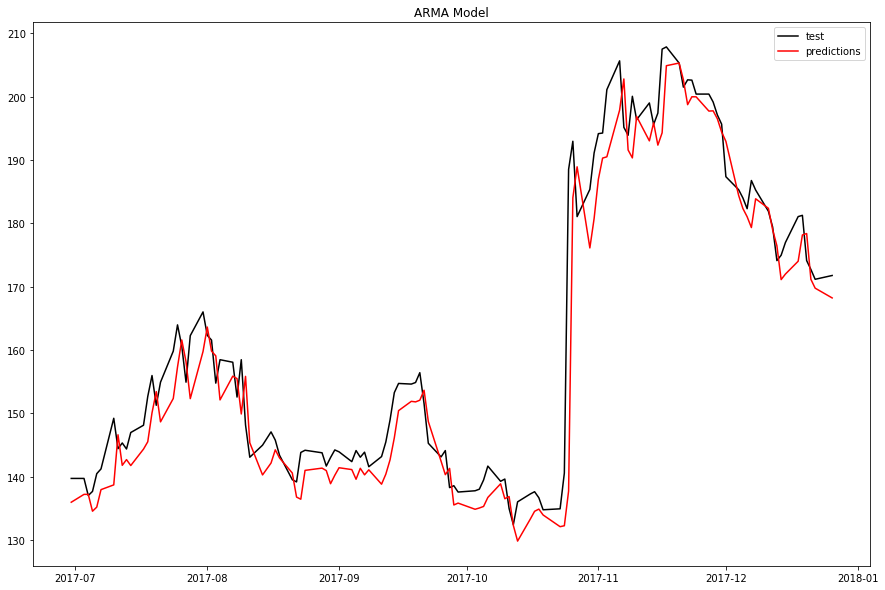

>predicted=138.723, expected=139.700
>predicted=139.901, expected=139.700
>predicted=139.700, expected=137.000
>predicted=136.565, expected=137.650
>predicted=137.754, expected=140.450
>predicted=140.899, expected=141.200
>predicted=141.320, expected=149.200
>predicted=150.500, expected=144.400
>predicted=143.738, expected=145.300
>predicted=145.421, expected=144.350
>predicted=144.222, expected=146.950
>predicted=147.295, expected=148.100
>predicted=148.253, expected=152.650
>predicted=153.265, expected=155.950
>predicted=156.412, expected=151.250
>predicted=150.628, expected=154.900
>predicted=155.348, expected=159.800
>predicted=160.433, expected=163.950
>predicted=164.514, expected=160.600
>predicted=160.170, expected=154.900
>predicted=154.112, expected=162.250
>predicted=163.106, expected=166.000
>predicted=166.467, expected=162.300
>predicted=161.865, expected=161.550
>predicted=161.461, expected=154.750
>predicted=153.918, expected=158.450
>predicted=158.854, expected=158.050
>

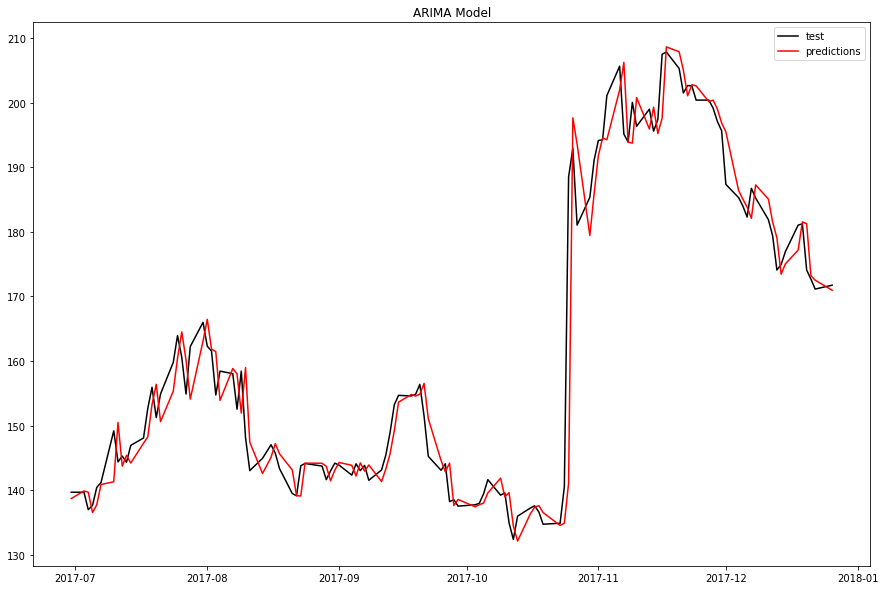

>predicted=332.650, expected=328.650
>predicted=328.578, expected=331.650
>predicted=331.650, expected=331.550
>predicted=331.480, expected=332.400
>predicted=332.400, expected=342.500
>predicted=342.430, expected=346.000
>predicted=346.000, expected=361.550
>predicted=361.550, expected=355.700
>predicted=355.700, expected=359.500
>predicted=359.500, expected=362.400
>predicted=362.400, expected=367.650
>predicted=367.579, expected=368.500
>predicted=368.500, expected=368.550
>predicted=368.481, expected=371.250
>predicted=371.250, expected=351.900
>predicted=351.826, expected=350.800
>predicted=350.800, expected=353.000
>predicted=353.000, expected=357.200
>predicted=357.127, expected=357.150
>predicted=357.150, expected=353.950
>predicted=353.950, expected=364.000
>predicted=364.000, expected=368.100
>predicted=368.100, expected=362.700
>predicted=362.700, expected=360.250
>predicted=360.250, expected=347.600
>predicted=347.600, expected=351.600
>predicted=351.600, expected=352.550
>

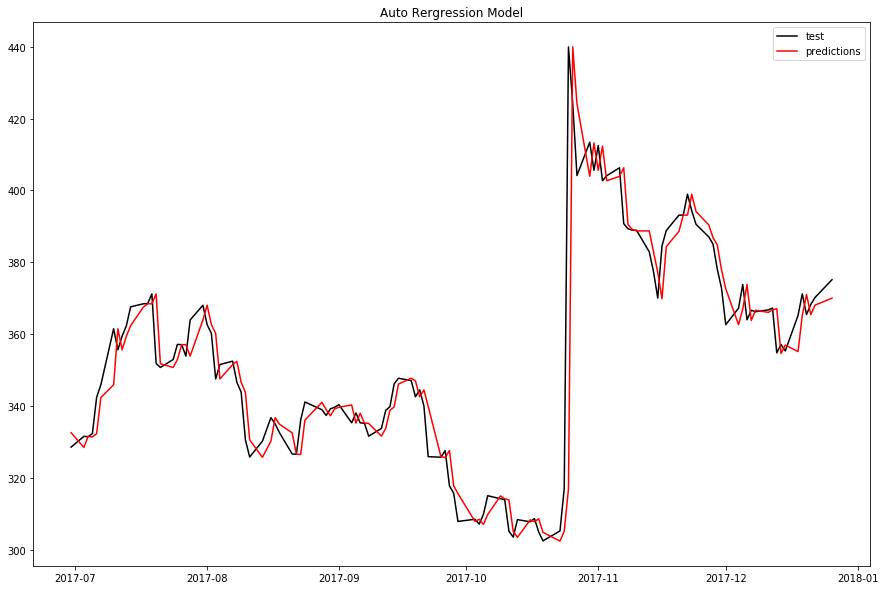

>predicted=332.647, expected=328.650
>predicted=328.630, expected=331.650
>predicted=331.637, expected=331.550
>predicted=331.527, expected=332.400
>predicted=332.388, expected=342.500
>predicted=342.499, expected=346.000
>predicted=345.984, expected=361.550
>predicted=361.543, expected=355.700
>predicted=355.692, expected=359.500
>predicted=359.493, expected=362.400
>predicted=362.389, expected=367.650
>predicted=367.633, expected=368.500
>predicted=368.475, expected=368.550
>predicted=368.530, expected=371.250
>predicted=371.243, expected=351.900
>predicted=351.879, expected=350.800
>predicted=350.791, expected=353.000
>predicted=352.985, expected=357.200
>predicted=357.182, expected=357.150
>predicted=357.131, expected=353.950
>predicted=353.925, expected=364.000
>predicted=363.994, expected=368.100
>predicted=368.085, expected=362.700
>predicted=362.677, expected=360.250
>predicted=360.238, expected=347.600
>predicted=347.581, expected=351.600
>predicted=351.576, expected=352.550
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=388.838, expected=393.150
>predicted=393.136, expected=393.150
>predicted=393.142, expected=398.950
>predicted=398.935, expected=394.350
>predicted=394.348, expected=390.600
>predicted=390.585, expected=387.100
>predicted=387.092, expected=385.100
>predicted=385.086, expected=378.150
>predicted=378.131, expected=372.850
>predicted=372.832, expected=362.700
>predicted=362.687, expected=367.250
>predicted=367.241, expected=373.850
>predicted=373.827, expected=364.050
>predicted=364.035, expected=366.700
>predicted=366.687, expected=366.300


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=366.282, expected=366.800
>predicted=366.784, expected=367.300
>predicted=367.300, expected=354.850
>predicted=354.844, expected=357.200
>predicted=357.174, expected=355.400
>predicted=355.384, expected=365.250
>predicted=365.235, expected=371.250
>predicted=371.247, expected=365.500
>predicted=365.484, expected=368.300
>predicted=368.269, expected=370.250
>predicted=370.219, expected=375.200
Test Root Mean Squared Error: 12.741
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(0, 1)   Log Likelihood               -1602.443
Method:                       css-mle   S.D. of innovations            170.242
Date:                Mon, 22 Jan 2018   AIC                           3208.885
Time:                        10:13:59   BIC                           3215.880
Sample:                             0   HQIC                          3211.702
   

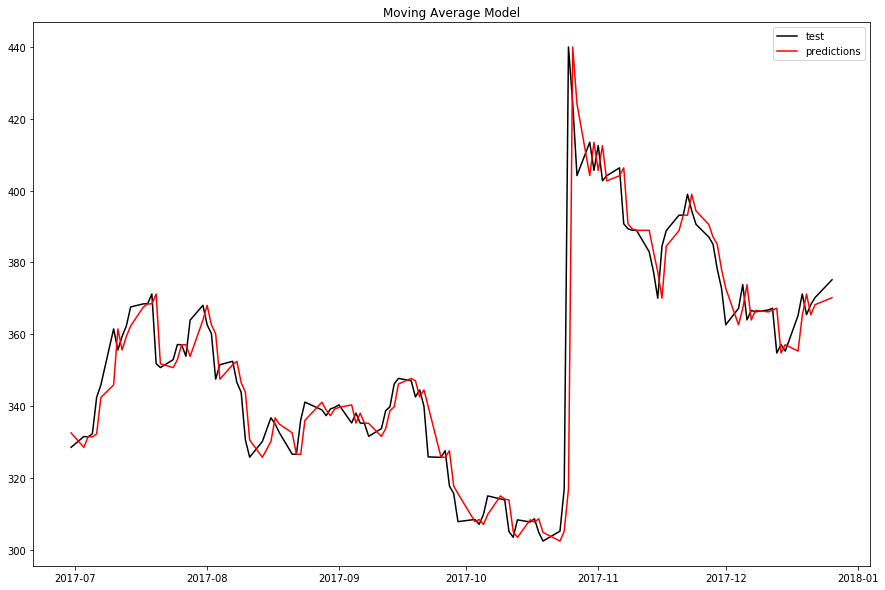

>predicted=327.713, expected=328.650
>predicted=323.678, expected=331.650
>predicted=326.721, expected=331.550
>predicted=326.644, expected=332.400
>predicted=327.527, expected=342.500
>predicted=337.735, expected=346.000
>predicted=341.351, expected=361.550
>predicted=357.261, expected=355.700
>predicted=351.180, expected=359.500
>predicted=355.160, expected=362.400
>predicted=358.218, expected=367.650
>predicted=363.715, expected=368.500
>predicted=364.648, expected=368.550
>predicted=364.744, expected=371.250
>predicted=367.598, expected=351.900
>predicted=347.205, expected=350.800
>predicted=346.108, expected=353.000
>predicted=348.401, expected=357.200
>predicted=352.754, expected=357.150
>predicted=352.740, expected=353.950
>predicted=349.466, expected=364.000
>predicted=359.801, expected=368.100


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=364.087, expected=362.700
>predicted=358.496, expected=360.250
>predicted=355.994, expected=347.600
>predicted=342.894, expected=351.600
>predicted=346.996, expected=352.550
>predicted=347.999, expected=346.650
>predicted=341.969, expected=343.950
>predicted=339.243, expected=330.700
>predicted=325.768, expected=325.900
>predicted=320.980, expected=330.300
>predicted=325.359, expected=336.850
>predicted=331.903, expected=335.100
>predicted=330.159, expected=332.700
>predicted=327.764, expected=326.750
>predicted=321.813, expected=326.700
>predicted=321.775, expected=336.150
>predicted=331.157, expected=341.200
>predicted=336.242, expected=339.050
>predicted=334.088, expected=337.450
>predicted=332.492, expected=339.300
>predicted=334.370, expected=339.750
>predicted=334.842, expected=340.450
>predicted=335.567, expected=335.400
>predicted=330.480, expected=338.150
>predicted=333.253, expected=335.400
>predicted=330.500, expected=335.300
>predicted=330.414, expected=331.700
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=398.903, expected=402.700
>predicted=388.584, expected=404.100
>predicted=390.361, expected=406.300
>predicted=392.984, expected=390.750
>predicted=376.621, expected=389.350
>predicted=375.349, expected=388.950
>predicted=375.110, expected=388.950
>predicted=375.279, expected=382.950
>predicted=369.213, expected=377.450
>predicted=363.689, expected=370.100
>predicted=356.300, expected=384.550
>predicted=370.979, expected=388.850
>predicted=375.540, expected=393.150
>predicted=380.137, expected=393.150
>predicted=380.297, expected=398.950
>predicted=386.477, expected=394.350
>predicted=381.838, expected=390.600
>predicted=378.093, expected=387.100
>predicted=374.609, expected=385.100
>predicted=372.670, expected=378.150
>predicted=365.659, expected=372.850
>predicted=360.362, expected=362.700
>predicted=350.196, expected=367.250
>predicted=354.770, expected=373.850
>predicted=361.430, expected=364.050
>predicted=351.612, expected=366.700
>predicted=354.298, expected=366.300
>

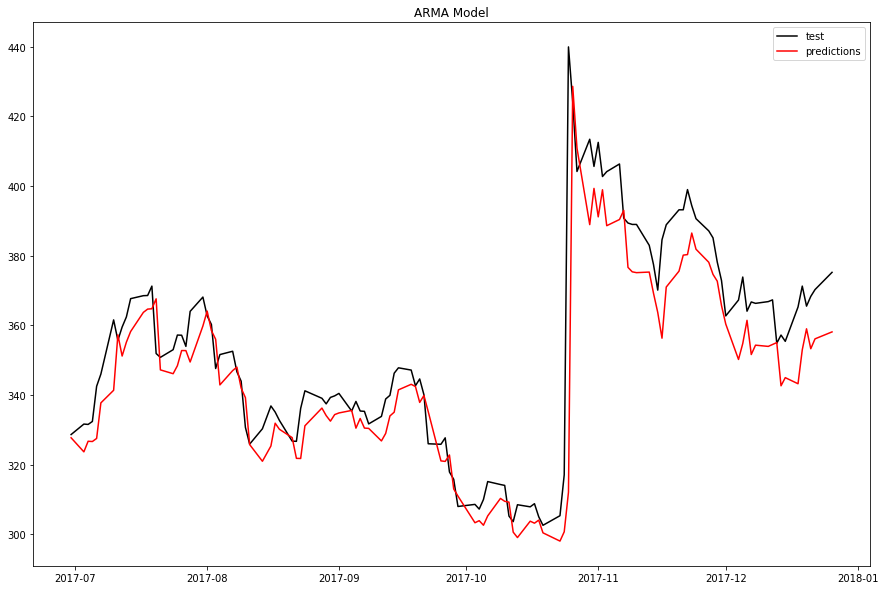

>predicted=333.446, expected=328.650
>predicted=328.199, expected=331.650
>predicted=331.980, expected=331.550
>predicted=331.539, expected=332.400
>predicted=332.493, expected=342.500
>predicted=343.612, expected=346.000
>predicted=346.398, expected=361.550
>predicted=363.451, expected=355.700
>predicted=355.130, expected=359.500
>predicted=359.852, expected=362.400
>predicted=362.672, expected=367.650
>predicted=368.152, expected=368.500
>predicted=368.581, expected=368.550
>predicted=368.555, expected=371.250
>predicted=371.507, expected=351.900
>predicted=350.209, expected=350.800
>predicted=350.704, expected=353.000
>predicted=353.191, expected=357.200
>predicted=357.569, expected=357.150
>predicted=357.146, expected=353.950
>predicted=353.669, expected=364.000
>predicted=364.813, expected=368.100
>predicted=368.450, expected=362.700
>predicted=362.260, expected=360.250
>predicted=360.044, expected=347.600
>predicted=346.444, expected=351.600
>predicted=351.924, expected=352.550
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=324.468, expected=325.850
>predicted=325.834, expected=327.700
>predicted=327.897, expected=317.900
>predicted=316.877, expected=315.800
>predicted=315.577, expected=308.000
>predicted=307.149, expected=308.600
>predicted=308.665, expected=307.250
>predicted=307.105, expected=310.000
>predicted=310.294, expected=315.150
>predicted=315.709, expected=314.300
>predicted=314.209, expected=314.050
>predicted=314.023, expected=305.250
>predicted=304.298, expected=303.650
>predicted=303.475, expected=308.500
>predicted=309.024, expected=307.900
>predicted=307.836, expected=308.800
>predicted=308.896, expected=305.050
>predicted=304.650, expected=302.600
>predicted=302.336, expected=305.350
>predicted=305.644, expected=317.100
>predicted=318.403, expected=439.900
>predicted=476.684, expected=424.100
>predicted=423.985, expected=404.150
>predicted=403.702, expected=413.400
>predicted=413.533, expected=405.600
>predicted=405.513, expected=412.500
>predicted=412.561, expected=402.700
>

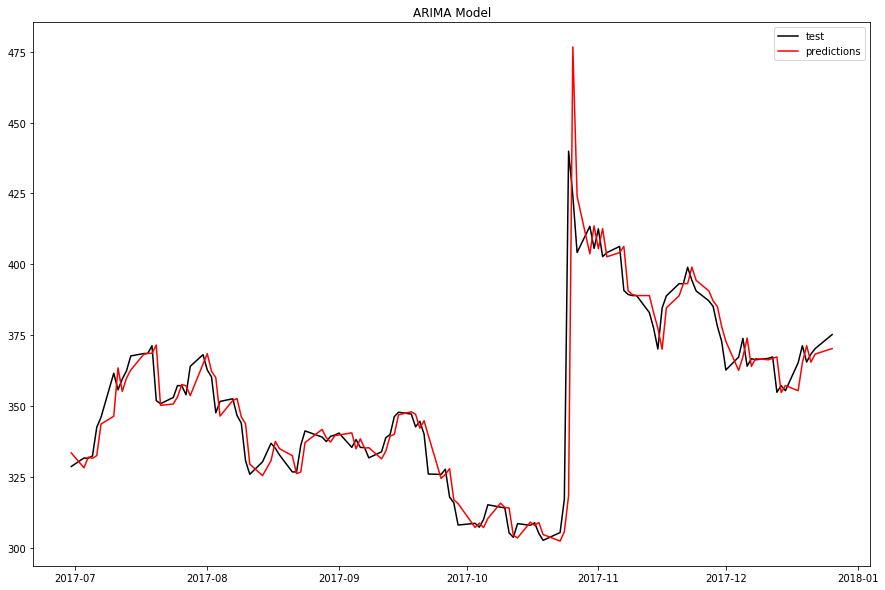

>predicted=112.972, expected=112.850
>predicted=112.850, expected=112.300
>predicted=112.300, expected=112.250
>predicted=112.250, expected=114.850
>predicted=114.823, expected=115.550
>predicted=115.550, expected=115.900
>predicted=115.873, expected=114.500
>predicted=114.473, expected=113.950
>predicted=113.923, expected=115.100


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=115.100, expected=115.150
>predicted=115.150, expected=115.800
>predicted=115.774, expected=114.100
>predicted=114.100, expected=113.400
>predicted=113.400, expected=115.500
>predicted=115.500, expected=119.000
>predicted=119.000, expected=117.400
>predicted=117.374, expected=116.950
>predicted=116.950, expected=119.350
>predicted=119.350, expected=115.000
>predicted=115.000, expected=113.100
>predicted=113.073, expected=113.750
>predicted=113.750, expected=115.250
>predicted=115.224, expected=115.100
>predicted=115.100, expected=114.800
>predicted=114.800, expected=113.400
>predicted=113.374, expected=114.250
>predicted=114.250, expected=114.500
>predicted=114.474, expected=112.300
>predicted=112.300, expected=108.300
>predicted=108.300, expected=104.700
>predicted=104.700, expected=105.650
>predicted=105.650, expected=108.800
>predicted=108.800, expected=110.150
>predicted=110.150, expected=110.050
>predicted=110.023, expected=108.550
>predicted=108.523, expected=106.000
>

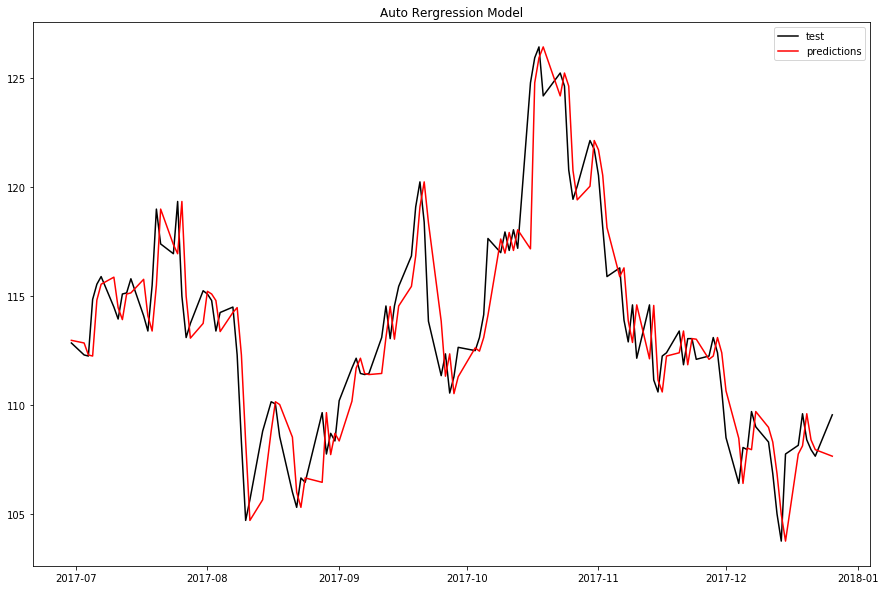

>predicted=112.998, expected=112.850
>predicted=112.845, expected=112.300
>predicted=112.297, expected=112.250
>predicted=112.246, expected=114.850
>predicted=114.847, expected=115.550
>predicted=115.546, expected=115.900
>predicted=115.895, expected=114.500
>predicted=114.496, expected=113.950
>predicted=113.947, expected=115.100
>predicted=115.095, expected=115.150
>predicted=115.145, expected=115.800
>predicted=115.792, expected=114.100
>predicted=114.096, expected=113.400
>predicted=113.393, expected=115.500
>predicted=115.495, expected=119.000
>predicted=118.994, expected=117.400
>predicted=117.397, expected=116.950
>predicted=116.948, expected=119.350
>predicted=119.345, expected=115.000
>predicted=114.997, expected=113.100
>predicted=113.097, expected=113.750
>predicted=113.747, expected=115.250
>predicted=115.248, expected=115.100
>predicted=115.094, expected=114.800
>predicted=114.795, expected=113.400
>predicted=113.396, expected=114.250
>predicted=114.240, expected=114.500
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=109.649, expected=107.750
>predicted=107.744, expected=108.700
>predicted=108.694, expected=108.350
>predicted=108.347, expected=110.200
>predicted=110.198, expected=111.700
>predicted=111.695, expected=112.150
>predicted=112.144, expected=111.450
>predicted=111.445, expected=111.400
>predicted=111.397, expected=111.450
>predicted=111.446, expected=113.100
>predicted=113.099, expected=114.550
>predicted=114.548, expected=113.050
>predicted=113.050, expected=114.550
>predicted=114.550, expected=115.450
>predicted=115.444, expected=116.850
>predicted=116.846, expected=119.100
>predicted=119.090, expected=120.250
>predicted=120.245, expected=118.400
>predicted=118.397, expected=113.850
>predicted=113.847, expected=111.350
>predicted=111.341, expected=112.350
>predicted=112.345, expected=110.550
>predicted=110.547, expected=111.300
>predicted=111.298, expected=112.650
>predicted=112.645, expected=112.500
>predicted=112.500, expected=113.100
>predicted=113.099, expected=114.150
>

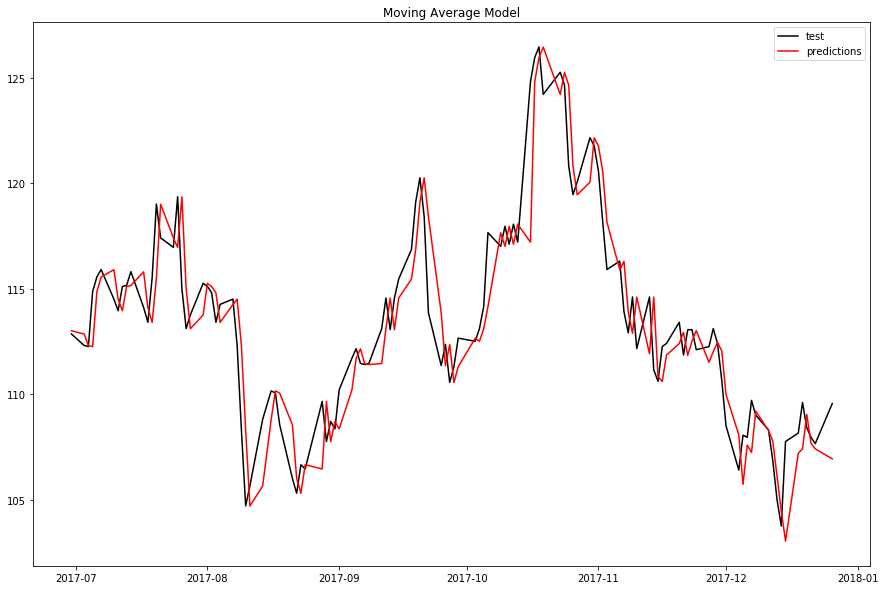

>predicted=112.459, expected=112.850
>predicted=112.313, expected=112.300
>predicted=111.760, expected=112.250
>predicted=111.714, expected=114.850
>predicted=114.347, expected=115.550
>predicted=115.061, expected=115.900
>predicted=115.421, expected=114.500
>predicted=114.005, expected=113.950
>predicted=113.452, expected=115.100
>predicted=114.620, expected=115.150
>predicted=114.675, expected=115.800
>predicted=115.337, expected=114.100
>predicted=113.617, expected=113.400
>predicted=112.912, expected=115.500
>predicted=115.037, expected=119.000
>predicted=118.572, expected=117.400
>predicted=116.954, expected=116.950
>predicted=116.503, expected=119.350
>predicted=118.929, expected=115.000
>predicted=114.514, expected=113.100
>predicted=112.592, expected=113.750
>predicted=113.253, expected=115.250
>predicted=114.772, expected=115.100
>predicted=114.624, expected=114.800
>predicted=114.325, expected=113.400
>predicted=112.911, expected=114.250
>predicted=113.774, expected=114.500
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=107.440, expected=107.650
>predicted=107.141, expected=109.550
Test Root Mean Squared Error: 1.897
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(1, 0)   Log Likelihood                -511.512
Method:                       css-mle   S.D. of innovations              1.950
Date:                Mon, 22 Jan 2018   AIC                           1029.023
Time:                        10:14:22   BIC                           1039.515
Sample:                             0   HQIC                          1033.249
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.1263     16.527      5.635      0.000      60.734     125.519
ar.L1.y        0.9953

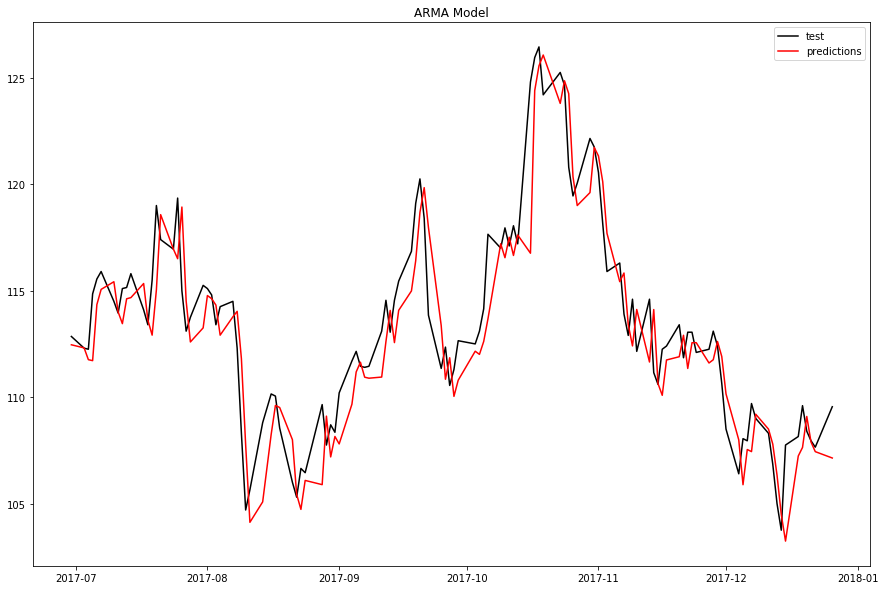

>predicted=113.141, expected=112.850
>predicted=112.830, expected=112.300
>predicted=112.226, expected=112.250
>predicted=112.243, expected=114.850
>predicted=115.196, expected=115.550
>predicted=115.643, expected=115.900
>predicted=115.947, expected=114.500
>predicted=114.314, expected=113.950
>predicted=113.875, expected=115.100
>predicted=115.254, expected=115.150
>predicted=115.157, expected=115.800
>predicted=115.887, expected=114.100
>predicted=113.876, expected=113.400
>predicted=113.305, expected=115.500
>predicted=115.776, expected=119.000
>predicted=119.493, expected=117.400
>predicted=117.197, expected=116.950
>predicted=116.892, expected=119.350
>predicted=119.651, expected=115.000
>predicted=114.535, expected=113.100
>predicted=112.869, expected=113.750
>predicted=113.827, expected=115.250
>predicted=115.430, expected=115.100
>predicted=115.082, expected=114.800
>predicted=114.764, expected=113.400
>predicted=113.231, expected=114.250
>predicted=114.351, expected=114.500
>

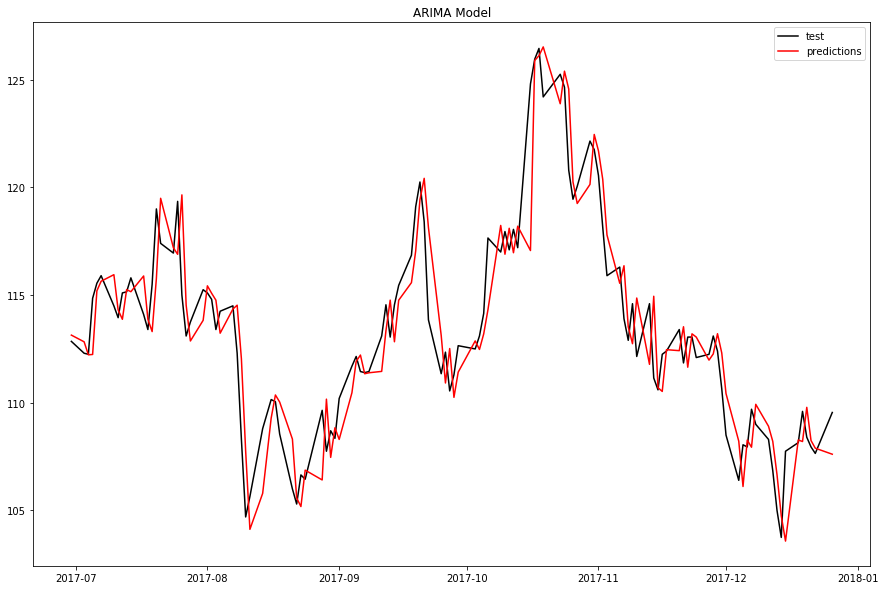

>predicted=1662.985, expected=1652.050
>predicted=1652.050, expected=1658.600
>predicted=1658.536, expected=1653.350
>predicted=1653.350, expected=1648.750
>predicted=1648.750, expected=1658.150
>predicted=1658.150, expected=1667.200
>predicted=1667.200, expected=1676.350
>predicted=1676.350, expected=1680.400
>predicted=1680.400, expected=1681.250
>predicted=1681.250, expected=1683.550
>predicted=1683.489, expected=1679.950
>predicted=1679.889, expected=1682.350
>predicted=1682.350, expected=1683.550
>predicted=1683.550, expected=1692.300
>predicted=1692.300, expected=1710.900
>predicted=1710.840, expected=1703.050
>predicted=1703.050, expected=1735.100
>predicted=1735.100, expected=1739.650
>predicted=1739.650, expected=1747.550
>predicted=1747.550, expected=1789.650
>predicted=1789.650, expected=1778.500
>predicted=1778.435, expected=1784.400
>predicted=1784.335, expected=1797.200
>predicted=1797.200, expected=1791.650
>predicted=1791.650, expected=1779.950
>predicted=1779.950, expe

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1813.476, expected=1802.350
>predicted=1802.276, expected=1800.250
>predicted=1800.176, expected=1807.700
>predicted=1807.700, expected=1825.550
>predicted=1825.477, expected=1838.150
>predicted=1838.150, expected=1846.250
>predicted=1846.250, expected=1855.250
>predicted=1855.178, expected=1842.850
>predicted=1842.850, expected=1851.400


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1851.400, expected=1857.550
>predicted=1857.550, expected=1865.350
>predicted=1865.350, expected=1873.300
>predicted=1873.229, expected=1853.700
>predicted=1853.700, expected=1848.200
>predicted=1848.200, expected=1834.100
>predicted=1834.100, expected=1820.450
>predicted=1820.450, expected=1803.300
>predicted=1803.227, expected=1809.650
>predicted=1809.650, expected=1840.400
>predicted=1840.327, expected=1846.400
>predicted=1846.400, expected=1819.900
>predicted=1819.900, expected=1821.350
>predicted=1821.350, expected=1838.050
>predicted=1838.050, expected=1873.450
>predicted=1873.450, expected=1878.950
>predicted=1878.876, expected=1884.500
>predicted=1884.500, expected=1868.150
>predicted=1868.150, expected=1868.300
>predicted=1868.300, expected=1876.650
>predicted=1876.650, expected=1868.350
Test Root Mean Squared Error: 14.948
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:        

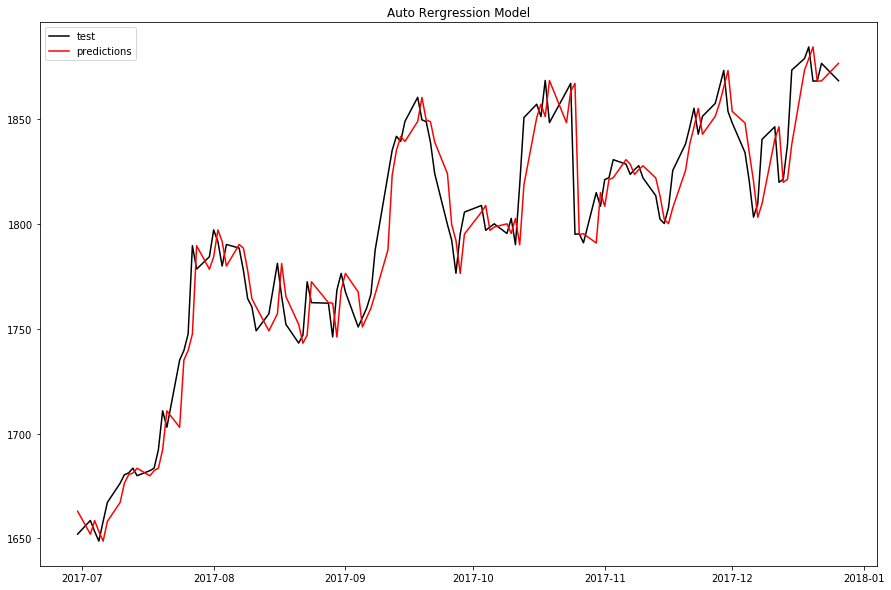

>predicted=1663.032, expected=1652.050
>predicted=1651.916, expected=1658.600
>predicted=1658.466, expected=1653.350
>predicted=1653.259, expected=1648.750
>predicted=1648.629, expected=1658.150
>predicted=1658.018, expected=1667.200
>predicted=1667.155, expected=1676.350
>predicted=1676.336, expected=1680.400
>predicted=1680.400, expected=1681.250
>predicted=1681.199, expected=1683.550
>predicted=1683.500, expected=1679.950
>predicted=1679.825, expected=1682.350
>predicted=1682.344, expected=1683.550
>predicted=1683.484, expected=1692.300
>predicted=1692.252, expected=1710.900
>predicted=1710.891, expected=1703.050
>predicted=1702.971, expected=1735.100
>predicted=1735.084, expected=1739.650
>predicted=1739.486, expected=1747.550
>predicted=1747.448, expected=1789.650
>predicted=1789.639, expected=1778.500
>predicted=1778.382, expected=1784.400
>predicted=1784.400, expected=1797.200
>predicted=1797.129, expected=1791.650
>predicted=1791.588, expected=1779.950
>predicted=1779.814, expe

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1746.090, expected=1768.550
>predicted=1768.500, expected=1776.450
>predicted=1776.382, expected=1767.600
>predicted=1767.542, expected=1750.900
>predicted=1750.861, expected=1755.350
>predicted=1755.299, expected=1759.900
>predicted=1759.829, expected=1766.550
>predicted=1766.496, expected=1787.650
>predicted=1787.632, expected=1823.350
>predicted=1823.306, expected=1835.200
>predicted=1835.109, expected=1841.850
>predicted=1841.754, expected=1839.400
>predicted=1839.318, expected=1848.950
>predicted=1848.773, expected=1860.450
>predicted=1860.347, expected=1849.700
>predicted=1849.652, expected=1848.850
>predicted=1848.737, expected=1839.100
>predicted=1839.000, expected=1824.100
>predicted=1824.061, expected=1799.750
>predicted=1799.750, expected=1792.300
>predicted=1792.224, expected=1776.500
>predicted=1776.424, expected=1795.300
>predicted=1795.298, expected=1805.700
>predicted=1805.697, expected=1808.850
>predicted=1808.826, expected=1797.000
>predicted=1796.931, expe

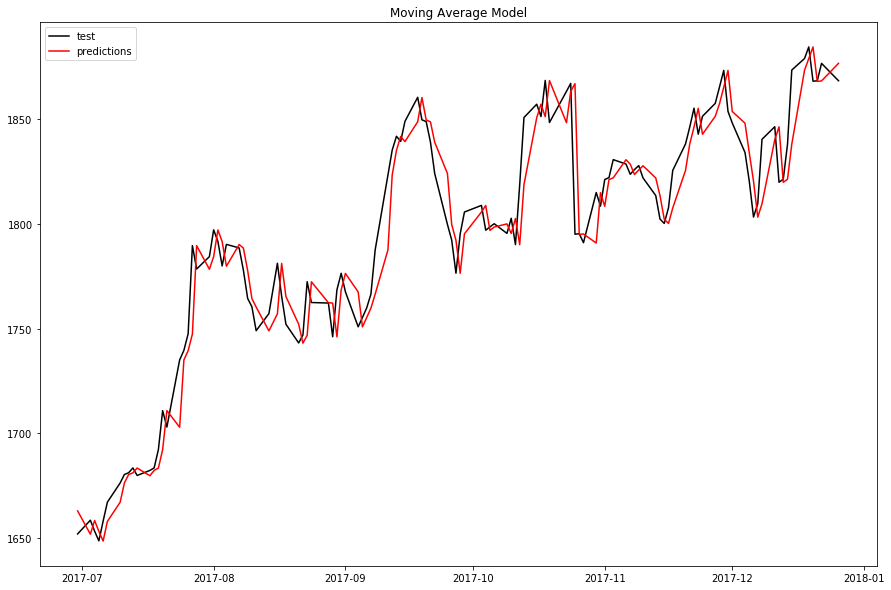

>predicted=1660.249, expected=1652.050
>predicted=1649.139, expected=1658.600
>predicted=1655.779, expected=1653.350
>predicted=1650.495, expected=1648.750
>predicted=1645.868, expected=1658.150
>predicted=1655.378, expected=1667.200
>predicted=1664.529, expected=1676.350
>predicted=1673.777, expected=1680.400
>predicted=1677.884, expected=1681.250
>predicted=1678.763, expected=1683.550
>predicted=1681.103, expected=1679.950
>predicted=1677.491, expected=1682.350
>predicted=1679.933, expected=1683.550
>predicted=1681.162, expected=1692.300
>predicted=1689.993, expected=1710.900
>predicted=1708.713, expected=1703.050
>predicted=1700.815, expected=1735.100
>predicted=1733.000, expected=1739.650
>predicted=1737.595, expected=1747.550
>predicted=1745.556, expected=1789.650
>predicted=1787.760, expected=1778.500
>predicted=1776.549, expected=1784.400
>predicted=1782.495, expected=1797.200
>predicted=1795.367, expected=1791.650
>predicted=1789.799, expected=1779.950
>predicted=1778.035, expe

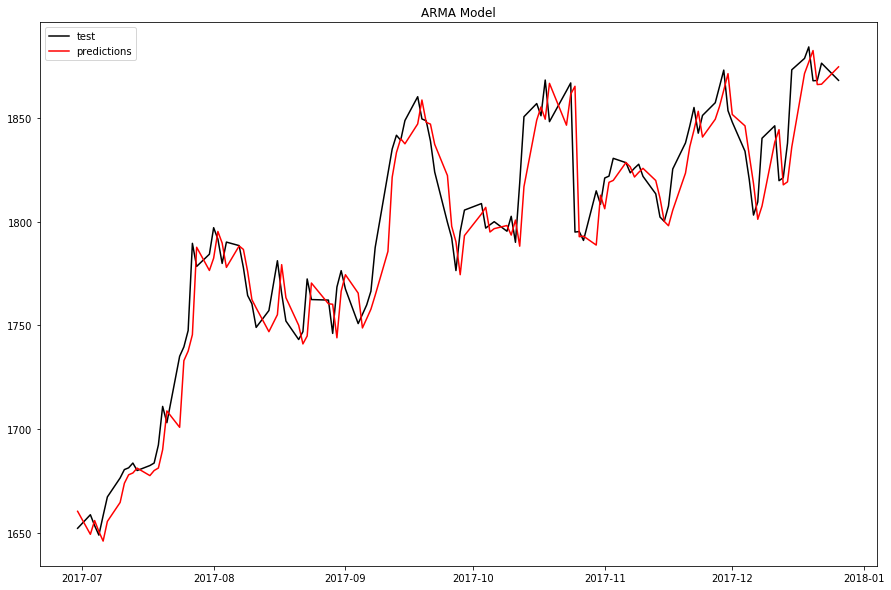

>predicted=1662.431, expected=1652.050
>predicted=1649.986, expected=1658.600
>predicted=1659.799, expected=1653.350
>predicted=1652.396, expected=1648.750
>predicted=1647.899, expected=1658.150
>predicted=1659.858, expected=1667.200
>predicted=1668.856, expected=1676.350
>predicted=1678.036, expected=1680.400
>predicted=1681.146, expected=1681.250
>predicted=1681.406, expected=1683.550
>predicted=1683.974, expected=1679.950
>predicted=1679.285, expected=1682.350
>predicted=1682.793, expected=1683.550
>predicted=1683.772, expected=1692.300
>predicted=1693.912, expected=1710.900
>predicted=1714.396, expected=1703.050
>predicted=1701.663, expected=1735.100
>predicted=1740.164, expected=1739.650
>predicted=1740.344, expected=1747.550
>predicted=1748.757, expected=1789.650
>predicted=1796.387, expected=1778.500
>predicted=1777.141, expected=1784.400
>predicted=1785.104, expected=1797.200
>predicted=1798.735, expected=1791.650
>predicted=1791.008, expected=1779.950
>predicted=1778.520, expe

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1755.860, expected=1759.900
>predicted=1760.422, expected=1766.550
>predicted=1767.314, expected=1787.650
>predicted=1790.120, expected=1823.350
>predicted=1828.244, expected=1835.200
>predicted=1836.877, expected=1841.850
>predicted=1842.795, expected=1839.400
>predicted=1839.054, expected=1848.950
>predicted=1850.285, expected=1860.450
>predicted=1862.075, expected=1849.700
>predicted=1848.228, expected=1848.850
>predicted=1848.732, expected=1839.100
>predicted=1837.731, expected=1824.100
>predicted=1821.875, expected=1799.750
>predicted=1795.739, expected=1792.300
>predicted=1791.029, expected=1776.500
>predicted=1773.704, expected=1795.300
>predicted=1798.397, expected=1805.700
>predicted=1807.438, expected=1808.850
>predicted=1809.375, expected=1797.000
>predicted=1795.022, expected=1798.600
>predicted=1798.866, expected=1800.100
>predicted=1800.350, expected=1795.500
>predicted=1794.732, expected=1802.700
>predicted=1803.892, expected=1790.150
>predicted=1788.099, expe

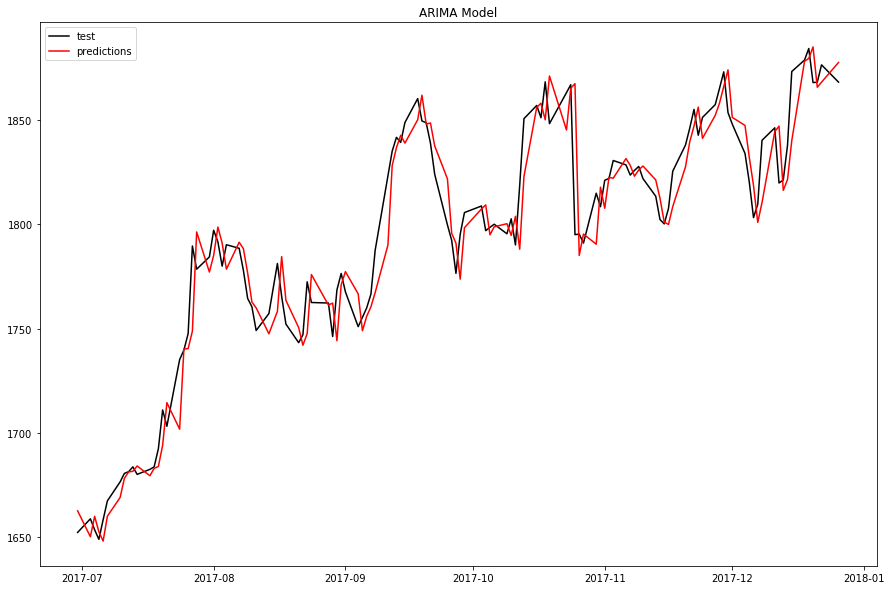

>predicted=293.191, expected=290.150
>predicted=290.150, expected=290.050
>predicted=290.050, expected=289.500
>predicted=289.442, expected=292.850
>predicted=292.850, expected=293.750
>predicted=293.750, expected=289.700
>predicted=289.700, expected=291.450
>predicted=291.394, expected=289.650
>predicted=289.594, expected=292.350
>predicted=292.295, expected=297.900
>predicted=297.900, expected=298.250
>predicted=298.250, expected=303.500
>predicted=303.445, expected=303.900
>predicted=303.900, expected=302.250
>predicted=302.250, expected=300.600
>predicted=300.546, expected=302.050
>predicted=302.050, expected=303.050
>predicted=302.997, expected=304.150
>predicted=304.150, expected=310.350
>predicted=310.350, expected=307.200
>predicted=307.200, expected=296.150
>predicted=296.150, expected=302.600
>predicted=302.600, expected=302.600
>predicted=302.546, expected=301.850
>predicted=301.850, expected=295.700
>predicted=295.700, expected=296.250
>predicted=296.250, expected=300.150
>

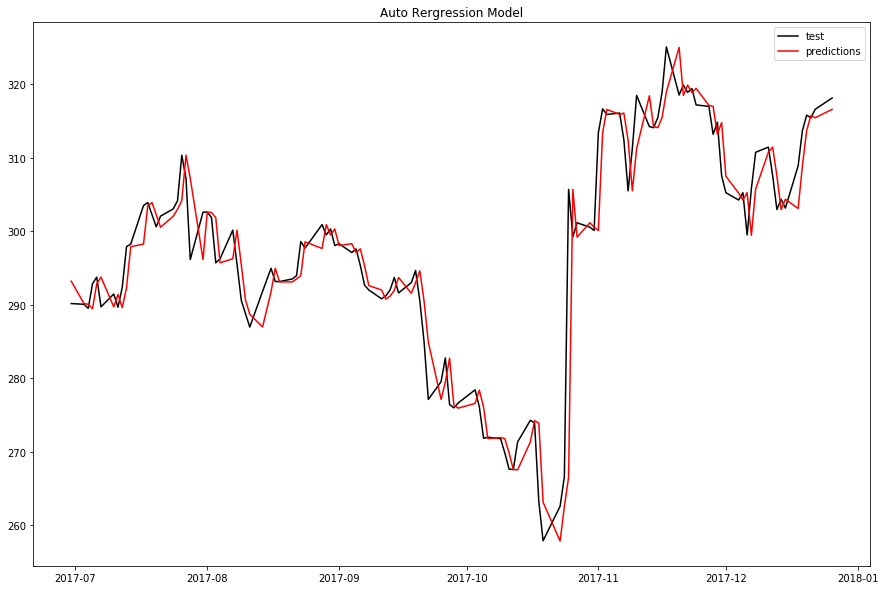

>predicted=293.228, expected=290.150
>predicted=290.130, expected=290.050
>predicted=290.036, expected=289.500
>predicted=289.487, expected=292.850
>predicted=292.819, expected=293.750
>predicted=293.729, expected=289.700
>predicted=289.667, expected=291.450
>predicted=291.427, expected=289.650
>predicted=289.648, expected=292.350
>predicted=292.344, expected=297.900
>predicted=297.877, expected=298.250
>predicted=298.243, expected=303.500
>predicted=303.477, expected=303.900
>predicted=303.879, expected=302.250
>predicted=302.233, expected=300.600
>predicted=300.576, expected=302.050
>predicted=302.037, expected=303.050
>predicted=303.025, expected=304.150
>predicted=304.123, expected=310.350
>predicted=310.324, expected=307.200
>predicted=307.197, expected=296.150
>predicted=296.126, expected=302.600
>predicted=302.568, expected=302.600
>predicted=302.574, expected=301.850
>predicted=301.847, expected=295.700


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=295.683, expected=296.250
>predicted=296.233, expected=300.150
>predicted=300.124, expected=295.500
>predicted=295.472, expected=290.600
>predicted=290.600, expected=288.750
>predicted=288.723, expected=286.950
>predicted=286.924, expected=291.800
>predicted=291.787, expected=294.950
>predicted=294.916, expected=293.150
>predicted=293.143, expected=293.150
>predicted=293.126, expected=293.500
>predicted=293.474, expected=293.950
>predicted=293.949, expected=298.600
>predicted=298.584, expected=297.700
>predicted=297.656, expected=300.900
>predicted=300.899, expected=299.500
>predicted=299.453, expected=300.300
>predicted=300.299, expected=298.050
>predicted=298.036, expected=298.300
>predicted=298.259, expected=297.100
>predicted=297.059, expected=297.600
>predicted=297.600, expected=295.350
>predicted=295.348, expected=292.650
>predicted=292.614, expected=292.000
>predicted=291.982, expected=290.800
>predicted=290.781, expected=291.200
>predicted=291.155, expected=292.000
>

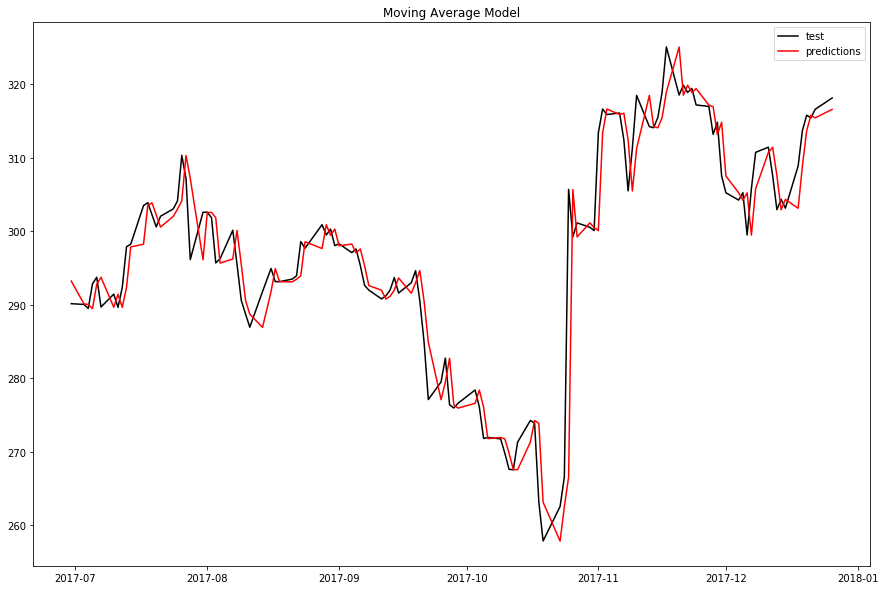

>predicted=281.755, expected=290.150
>predicted=278.662, expected=290.050
>predicted=278.590, expected=289.500
>predicted=278.072, expected=292.850
>predicted=281.394, expected=293.750
>predicted=282.333, expected=289.700
>predicted=278.271, expected=291.450
>predicted=280.020, expected=289.650
>predicted=278.253, expected=292.350
>predicted=280.934, expected=297.900
>predicted=286.506, expected=298.250
>predicted=286.923, expected=303.500
>predicted=292.399, expected=303.900
>predicted=292.913, expected=302.250
>predicted=291.242, expected=300.600
>predicted=289.576, expected=302.050
>predicted=291.155, expected=303.050
>predicted=292.280, expected=304.150
>predicted=293.520, expected=310.350
>predicted=300.171, expected=307.200
>predicted=296.835, expected=296.150
>predicted=284.981, expected=302.600
>predicted=291.534, expected=302.600
>predicted=291.604, expected=301.850
>predicted=290.886, expected=295.700
>predicted=284.518, expected=296.250
>predicted=285.105, expected=300.150
>

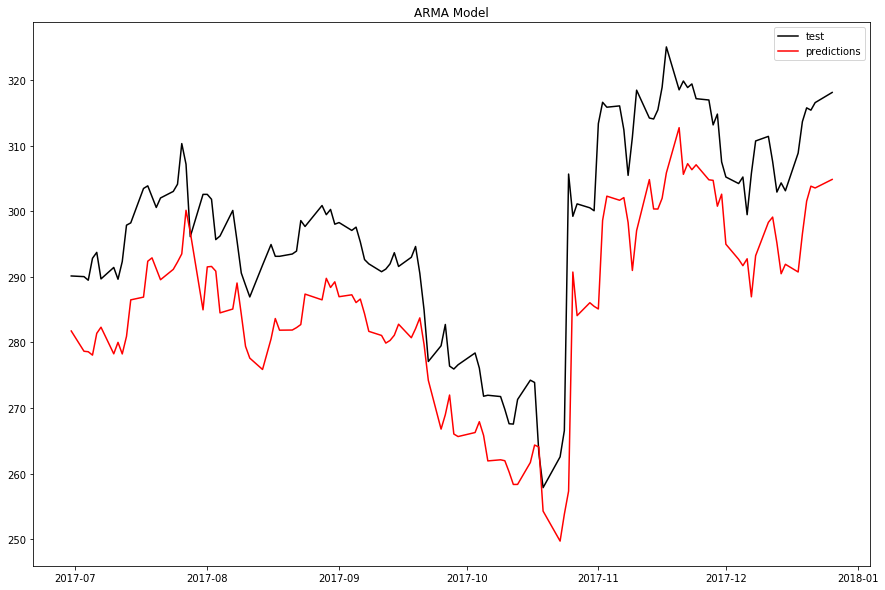

>predicted=293.023, expected=290.150
>predicted=290.399, expected=290.050
>predicted=290.058, expected=289.500
>predicted=289.544, expected=292.850
>predicted=292.581, expected=293.750
>predicted=293.678, expected=289.700
>predicted=290.026, expected=291.450
>predicted=291.307, expected=289.650
>predicted=289.799, expected=292.350
>predicted=292.124, expected=297.900
>predicted=297.455, expected=298.250
>predicted=298.222, expected=303.500
>predicted=303.082, expected=303.900
>predicted=303.868, expected=302.250
>predicted=302.381, expected=300.600
>predicted=300.729, expected=302.050
>predicted=301.936, expected=303.050
>predicted=302.972, expected=304.150
>predicted=304.064, expected=310.350
>predicted=309.873, expected=307.200
>predicted=307.457, expected=296.150
>predicted=296.933, expected=302.600
>predicted=302.044, expected=302.600
>predicted=302.600, expected=301.850
>predicted=301.914, expected=295.700
>predicted=296.217, expected=296.250
>predicted=296.204, expected=300.150
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=292.050, expected=290.800
>predicted=290.891, expected=291.200
>predicted=291.170, expected=292.000
>predicted=291.939, expected=293.700
>predicted=293.571, expected=291.600
>predicted=291.761, expected=293.000
>predicted=292.892, expected=294.650
>predicted=294.523, expected=290.550
>predicted=290.871, expected=284.950
>predicted=285.353, expected=277.100
>predicted=277.574, expected=279.500
>predicted=279.347, expected=282.750
>predicted=282.548, expected=276.400
>predicted=276.823, expected=275.950
>predicted=275.979, expected=276.600
>predicted=276.558, expected=278.400
>predicted=278.283, expected=276.100
>predicted=276.251, expected=271.800
>predicted=272.072, expected=271.950
>predicted=271.941, expected=271.750
>predicted=271.763, expected=269.800
>predicted=269.923, expected=267.600
>predicted=267.736, expected=267.550
>predicted=267.553, expected=271.300
>predicted=271.068, expected=274.250
>predicted=274.075, expected=273.900
>predicted=273.921, expected=263.150
>

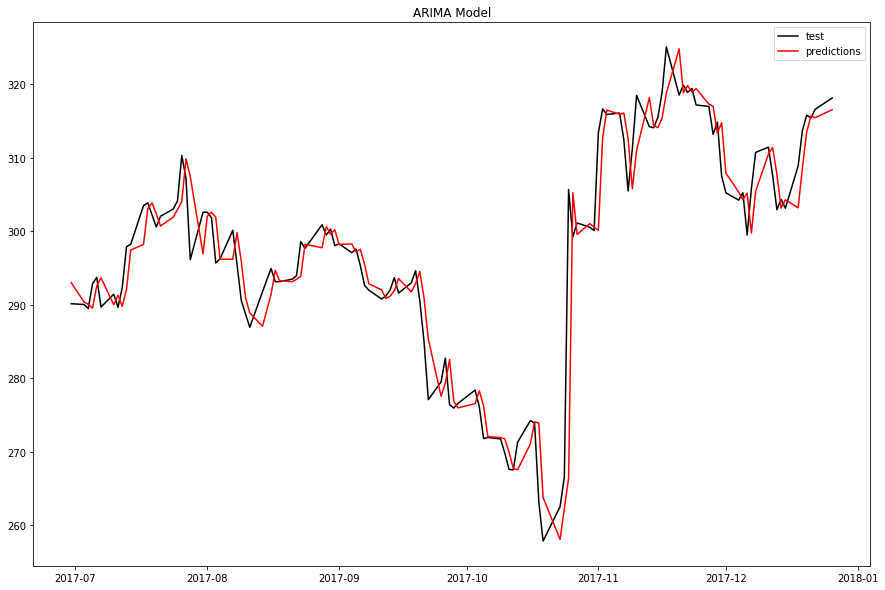

>predicted=1479.550, expected=1478.950
>predicted=1478.950, expected=1490.950
>predicted=1490.843, expected=1497.800
>predicted=1497.694, expected=1516.350
>predicted=1516.350, expected=1519.550
>predicted=1519.550, expected=1526.300
>predicted=1526.300, expected=1560.350
>predicted=1560.243, expected=1560.700
>predicted=1560.700, expected=1577.000
>predicted=1577.000, expected=1579.900
>predicted=1579.795, expected=1574.500
>predicted=1574.396, expected=1581.050
>predicted=1581.050, expected=1570.100
>predicted=1570.100, expected=1574.550
>predicted=1574.550, expected=1560.000
>predicted=1560.000, expected=1566.650
>predicted=1566.650, expected=1554.500
>predicted=1554.500, expected=1542.500
>predicted=1542.398, expected=1580.200
>predicted=1580.200, expected=1606.700
>predicted=1606.594, expected=1628.350
>predicted=1628.350, expected=1645.750
>predicted=1645.750, expected=1665.700
>predicted=1665.700, expected=1658.750


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1658.750, expected=1645.200
>predicted=1645.095, expected=1664.700
>predicted=1664.700, expected=1650.500
>predicted=1650.500, expected=1638.650
>predicted=1638.650, expected=1637.250
>predicted=1637.250, expected=1629.400
>predicted=1629.400, expected=1625.350
>predicted=1625.350, expected=1624.700
>predicted=1624.700, expected=1647.200
>predicted=1647.097, expected=1628.500
>predicted=1628.396, expected=1621.050
>predicted=1620.946, expected=1616.100
>predicted=1616.100, expected=1626.300
>predicted=1626.300, expected=1660.900
>predicted=1660.900, expected=1667.700
>predicted=1667.596, expected=1660.550
>predicted=1660.550, expected=1643.300
>predicted=1643.196, expected=1655.800
>predicted=1655.800, expected=1656.750
>predicted=1656.647, expected=1692.250
>predicted=1692.250, expected=1669.450
>predicted=1669.450, expected=1684.750
>predicted=1684.750, expected=1684.800
>predicted=1684.800, expected=1703.900
>predicted=1703.900, expected=1695.900
>predicted=1695.900, expe

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1750.350, expected=1716.000
>predicted=1716.000, expected=1707.700
>predicted=1707.568, expected=1708.300
>predicted=1708.300, expected=1690.850
>predicted=1690.850, expected=1695.500
>predicted=1695.500, expected=1664.900
>predicted=1664.900, expected=1592.400
>predicted=1592.400, expected=1617.600
>predicted=1617.600, expected=1627.350
>predicted=1627.350, expected=1620.750
>predicted=1620.605, expected=1627.150
>predicted=1627.150, expected=1642.550
>predicted=1642.550, expected=1627.500
>predicted=1627.500, expected=1674.500
>predicted=1674.500, expected=1648.000
>predicted=1648.000, expected=1654.300
>predicted=1654.154, expected=1674.400
>predicted=1674.400, expected=1666.750
>predicted=1666.750, expected=1660.300
>predicted=1660.300, expected=1659.200
>predicted=1659.056, expected=1637.700
>predicted=1637.700, expected=1597.350
>predicted=1597.350, expected=1603.900
>predicted=1603.900, expected=1631.900
>predicted=1631.752, expected=1649.300
>predicted=1649.300, expe

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1678.600, expected=1670.050
>predicted=1669.908, expected=1660.900
>predicted=1660.900, expected=1656.200
>predicted=1656.200, expected=1651.850
>predicted=1651.709, expected=1664.200
Test Root Mean Squared Error: 20.470
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(1, 0)   Log Likelihood               -1059.812
Method:                       css-mle   S.D. of innovations             18.298
Date:                Mon, 22 Jan 2018   AIC                           2123.625
Time:                        10:15:02   BIC                           2130.619
Sample:                             0   HQIC                          2126.442
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

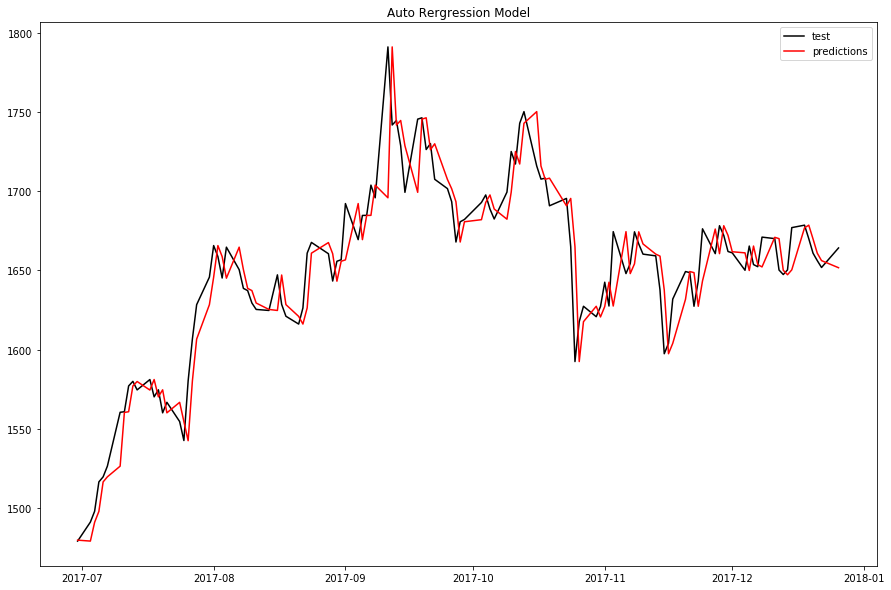

>predicted=1479.449, expected=1478.950
>predicted=1478.858, expected=1490.950
>predicted=1490.881, expected=1497.800
>predicted=1497.786, expected=1516.350
>predicted=1516.324, expected=1519.550
>predicted=1519.498, expected=1526.300
>predicted=1526.211, expected=1560.350
>predicted=1560.290, expected=1560.700
>predicted=1560.615, expected=1577.000
>predicted=1576.956, expected=1579.900
>predicted=1579.831, expected=1574.500
>predicted=1574.371, expected=1581.050
>predicted=1580.949, expected=1570.100
>predicted=1569.976, expected=1574.550
>predicted=1574.507, expected=1560.000
>predicted=1559.974, expected=1566.650
>predicted=1566.631, expected=1554.500
>predicted=1554.479, expected=1542.500
>predicted=1542.437, expected=1580.200
>predicted=1580.097, expected=1606.700
>predicted=1606.667, expected=1628.350
>predicted=1628.303, expected=1645.750
>predicted=1645.628, expected=1665.700
>predicted=1665.567, expected=1658.750
>predicted=1658.656, expected=1645.200


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1645.078, expected=1664.700
>predicted=1664.698, expected=1650.500
>predicted=1650.392, expected=1638.650
>predicted=1638.598, expected=1637.250
>predicted=1637.250, expected=1629.400
>predicted=1629.257, expected=1625.350
>predicted=1625.349, expected=1624.700
>predicted=1624.656, expected=1647.200
>predicted=1647.123, expected=1628.500
>predicted=1628.436, expected=1621.050
>predicted=1620.897, expected=1616.100
>predicted=1615.990, expected=1626.300
>predicted=1626.263, expected=1660.900
>predicted=1660.809, expected=1667.700
>predicted=1667.637, expected=1660.550
>predicted=1660.422, expected=1643.300
>predicted=1643.196, expected=1655.800
>predicted=1655.785, expected=1656.750
>predicted=1656.750, expected=1692.250
>predicted=1692.159, expected=1669.450
>predicted=1669.372, expected=1684.750
>predicted=1684.740, expected=1684.800
>predicted=1684.798, expected=1703.900
>predicted=1703.740, expected=1695.900
>predicted=1695.876, expected=1791.250
>predicted=1791.250, expe

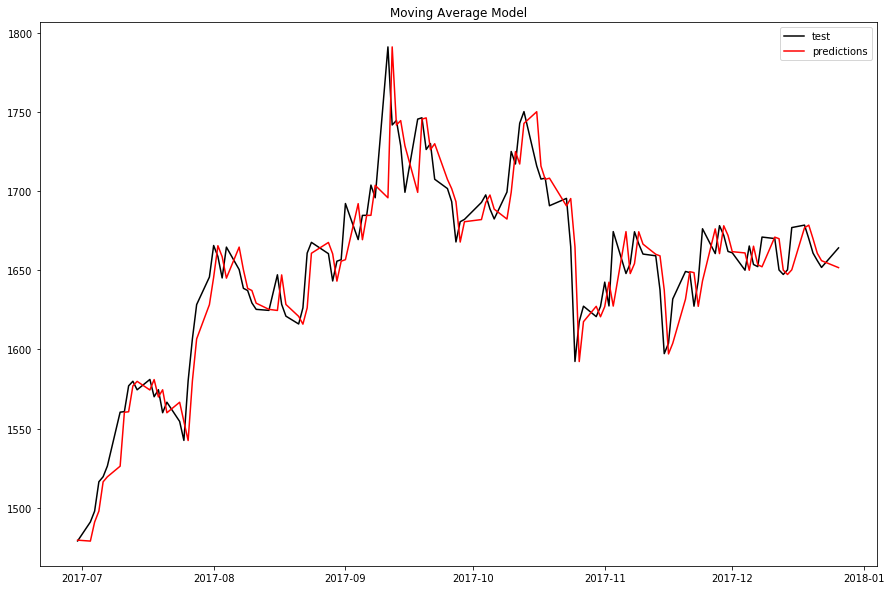

>predicted=1473.670, expected=1478.950
>predicted=1473.114, expected=1490.950
>predicted=1485.386, expected=1497.800
>predicted=1492.418, expected=1516.350
>predicted=1511.313, expected=1519.550
>predicted=1514.621, expected=1526.300
>predicted=1521.535, expected=1560.350
>predicted=1556.017, expected=1560.700
>predicted=1556.415, expected=1577.000
>predicted=1572.970, expected=1579.900
>predicted=1575.951, expected=1574.500
>predicted=1570.505, expected=1581.050
>predicted=1577.181, expected=1570.100
>predicted=1566.091, expected=1574.550
>predicted=1570.640, expected=1560.000
>predicted=1555.881, expected=1566.650
>predicted=1562.660, expected=1554.500
>predicted=1550.345, expected=1542.500
>predicted=1538.178, expected=1580.200
>predicted=1576.259, expected=1606.700
>predicted=1603.056, expected=1628.350
>predicted=1624.948, expected=1645.750
>predicted=1642.540, expected=1665.700
>predicted=1662.683, expected=1658.750
>predicted=1655.684, expected=1645.200
>predicted=1642.001, expe

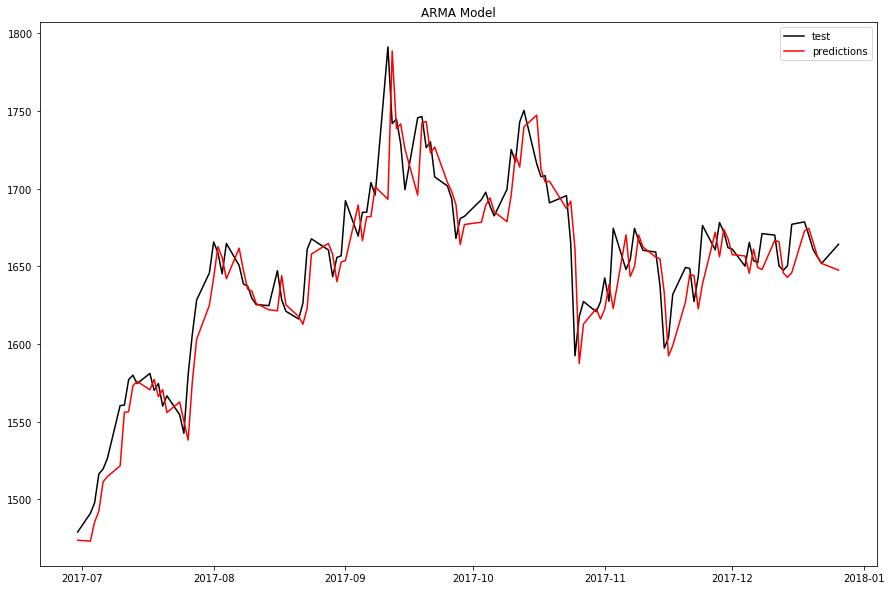

>predicted=1479.802, expected=1478.950
>predicted=1478.962, expected=1490.950
>predicted=1490.689, expected=1497.800
>predicted=1497.659, expected=1516.350
>predicted=1516.003, expected=1519.550
>predicted=1519.490, expected=1526.300
>predicted=1526.174, expected=1560.350
>predicted=1559.834, expected=1560.700
>predicted=1560.694, expected=1577.000
>predicted=1576.684, expected=1579.900
>predicted=1579.843, expected=1574.500
>predicted=1574.605, expected=1581.050
>predicted=1580.918, expected=1570.100
>predicted=1570.337, expected=1574.550
>predicted=1574.453, expected=1560.000
>predicted=1560.326, expected=1566.650
>predicted=1566.490, expected=1554.500
>predicted=1554.812, expected=1542.500
>predicted=1542.714, expected=1580.200
>predicted=1578.906, expected=1606.700
>predicted=1606.462, expected=1628.350
>predicted=1628.428, expected=1645.750
>predicted=1645.938, expected=1665.700
>predicted=1666.044, expected=1658.750
>predicted=1658.667, expected=1645.200
>predicted=1644.964, expe

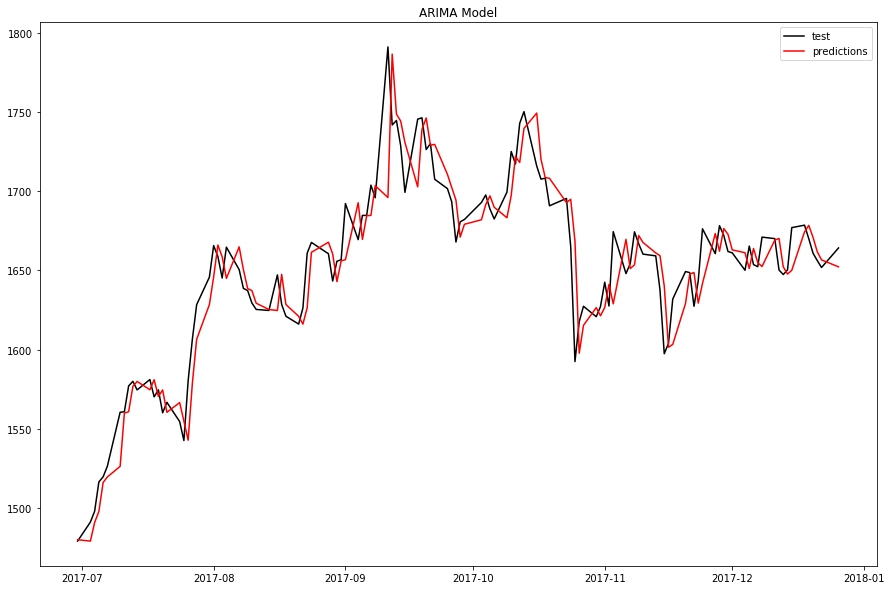

>predicted=948.280, expected=955.750
>predicted=955.750, expected=948.850
>predicted=948.850, expected=958.800
>predicted=958.731, expected=959.850
>predicted=959.850, expected=958.100
>predicted=958.100, expected=964.700
>predicted=964.700, expected=968.000
>predicted=968.000, expected=958.750
>predicted=958.750, expected=956.650
>predicted=956.650, expected=962.100
>predicted=962.100, expected=977.200
>predicted=977.133, expected=979.700
>predicted=979.700, expected=977.100
>predicted=977.100, expected=994.200
>predicted=994.200, expected=980.000
>predicted=980.000, expected=999.450
>predicted=999.450, expected=992.950
>predicted=992.950, expected=987.950
>predicted=987.882, expected=986.550
>predicted=986.550, expected=998.150
>predicted=998.083, expected=1012.700
>predicted=1012.633, expected=1021.650
>predicted=1021.650, expected=1015.300
>predicted=1015.233, expected=1010.900
>predicted=1010.900, expected=996.400
>predicted=996.333, expected=996.200
>predicted=996.200, expected=9

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1011.400, expected=1005.350
>predicted=1005.350, expected=993.400
>predicted=993.400, expected=994.700
>predicted=994.621, expected=999.200
>predicted=999.200, expected=1011.500
>predicted=1011.421, expected=1017.450
>predicted=1017.450, expected=1023.200
>predicted=1023.200, expected=1040.550
>predicted=1040.550, expected=1029.850
>predicted=1029.772, expected=1026.250
>predicted=1026.250, expected=1022.100
>predicted=1022.100, expected=1030.350
>predicted=1030.350, expected=1036.450
>predicted=1036.450, expected=1029.850
>predicted=1029.850, expected=1026.250
>predicted=1026.250, expected=1000.300
>predicted=1000.300, expected=1005.150
>predicted=1005.150, expected=997.950
>predicted=997.950, expected=999.850
>predicted=999.772, expected=999.650
>predicted=999.572, expected=1001.600
>predicted=1001.600, expected=1009.000
>predicted=1009.000, expected=1008.500
>predicted=1008.423, expected=1000.400
>predicted=1000.400, expected=1014.900
>predicted=1014.900, expected=1024.65

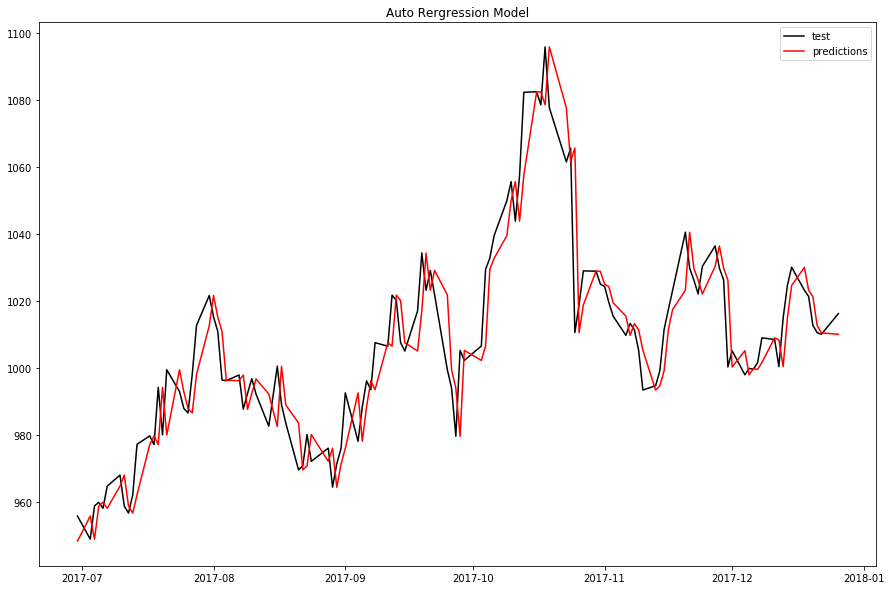

>predicted=948.269, expected=955.750
>predicted=955.726, expected=948.850
>predicted=948.805, expected=958.800
>predicted=958.749, expected=959.850
>predicted=959.846, expected=958.100
>predicted=958.092, expected=964.700
>predicted=964.634, expected=968.000
>predicted=967.983, expected=958.750
>predicted=958.699, expected=956.650
>predicted=956.613, expected=962.100
>predicted=962.057, expected=977.200
>predicted=977.195, expected=979.700
>predicted=979.657, expected=977.100
>predicted=977.020, expected=994.200
>predicted=994.155, expected=980.000
>predicted=979.959, expected=999.450
>predicted=999.389, expected=992.950
>predicted=992.888, expected=987.950
>predicted=987.926, expected=986.550
>predicted=986.450, expected=998.150
>predicted=998.090, expected=1012.700
>predicted=1012.672, expected=1021.650
>predicted=1021.632, expected=1015.300
>predicted=1015.279, expected=1010.900
>predicted=1010.806, expected=996.400
>predicted=996.379, expected=996.200
>predicted=996.183, expected=9

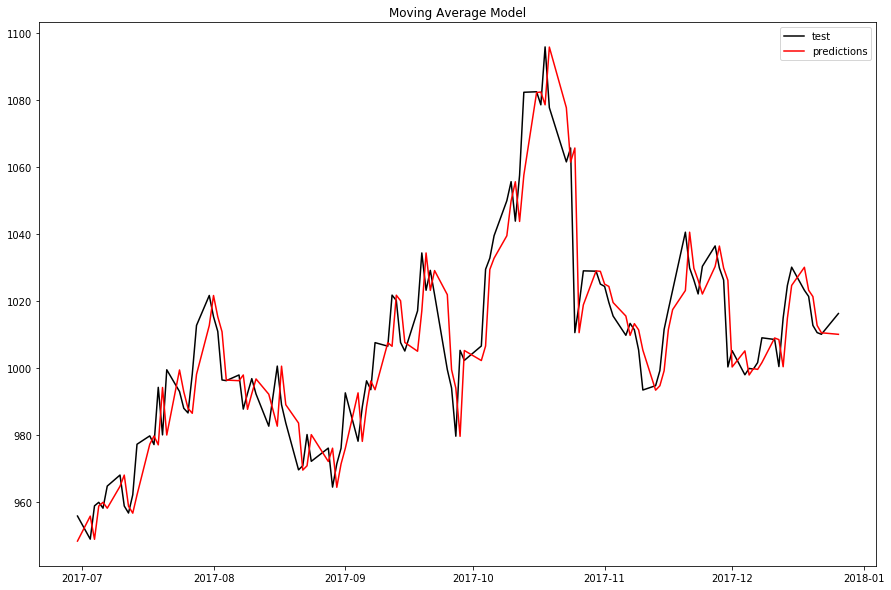

>predicted=944.113, expected=955.750
>predicted=951.704, expected=948.850
>predicted=944.666, expected=958.800
>predicted=954.845, expected=959.850
>predicted=955.955, expected=958.100
>predicted=954.201, expected=964.700
>predicted=960.966, expected=968.000
>predicted=964.367, expected=958.750
>predicted=954.926, expected=956.650
>predicted=952.813, expected=962.100
>predicted=958.401, expected=977.200
>predicted=973.770, expected=979.700
>predicted=976.348, expected=977.100
>predicted=973.726, expected=994.200
>predicted=991.097, expected=980.000
>predicted=976.600, expected=999.450
>predicted=996.343, expected=992.950
>predicted=989.740, expected=987.950
>predicted=984.669, expected=986.550
>predicted=983.271, expected=998.150
>predicted=995.073, expected=1012.700
>predicted=1009.846, expected=1021.650
>predicted=1018.946, expected=1015.300
>predicted=1012.511, expected=1010.900
>predicted=1008.060, expected=996.400
>predicted=993.294, expected=996.200
>predicted=993.116, expected=9

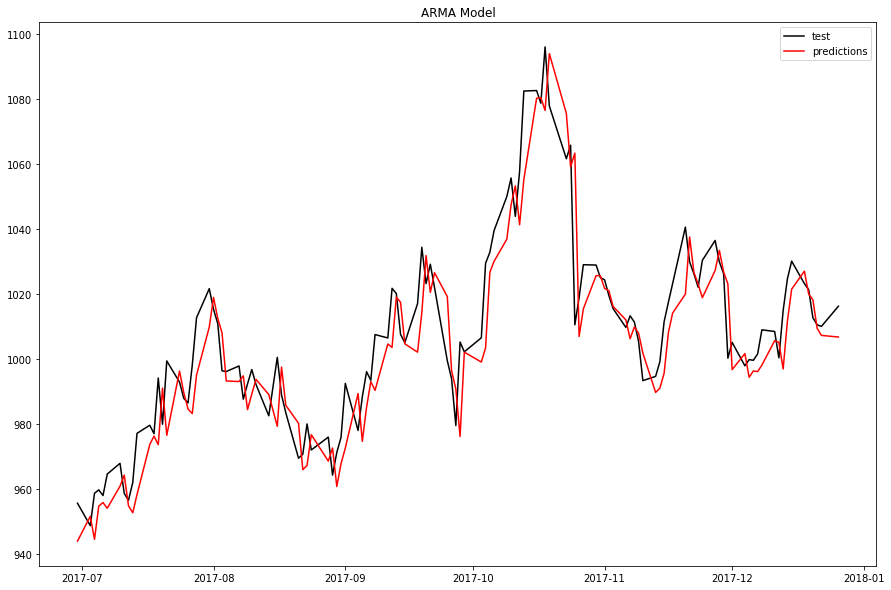

>predicted=949.063, expected=955.750
>predicted=955.455, expected=948.850
>predicted=949.151, expected=958.800
>predicted=958.311, expected=959.850
>predicted=959.798, expected=958.100
>predicted=958.186, expected=964.700
>predicted=964.367, expected=968.000
>predicted=967.835, expected=958.750
>predicted=959.223, expected=956.650
>predicted=956.749, expected=962.100
>predicted=961.838, expected=977.200
>predicted=976.530, expected=979.700
>predicted=979.592, expected=977.100
>predicted=977.213, expected=994.200
>predicted=993.366, expected=980.000
>predicted=980.947, expected=999.450
>predicted=997.764, expected=992.950
>predicted=993.572, expected=987.950
>predicted=988.404, expected=986.550
>predicted=986.674, expected=998.150
>predicted=997.094, expected=1012.700
>predicted=1011.511, expected=1021.650
>predicted=1020.981, expected=1015.300
>predicted=1015.799, expected=1010.900
>predicted=1011.227, expected=996.400
>predicted=997.364, expected=996.200
>predicted=996.213, expected=9

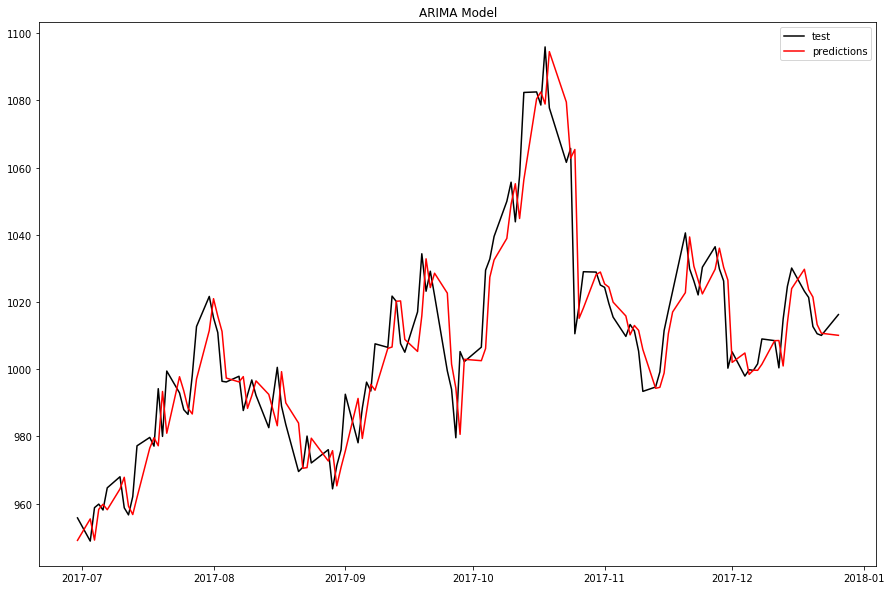

>predicted=138.050, expected=137.300
>predicted=137.300, expected=139.250
>predicted=139.250, expected=136.550
>predicted=136.510, expected=136.600
>predicted=136.600, expected=143.300
>predicted=143.259, expected=144.200
>predicted=144.200, expected=153.250
>predicted=153.250, expected=149.400
>predicted=149.357, expected=152.350
>predicted=152.308, expected=152.250
>predicted=152.208, expected=153.650
>predicted=153.650, expected=152.900
>predicted=152.900, expected=154.850
>predicted=154.809, expected=158.300
>predicted=158.259, expected=156.750
>predicted=156.750, expected=158.250
>predicted=158.209, expected=161.300
>predicted=161.260, expected=162.950
>predicted=162.910, expected=158.900
>predicted=158.900, expected=154.150
>predicted=154.150, expected=158.850
>predicted=158.850, expected=162.300
>predicted=162.300, expected=157.500
>predicted=157.500, expected=158.950
>predicted=158.950, expected=149.300
>predicted=149.300, expected=151.050
>predicted=151.050, expected=152.100
>

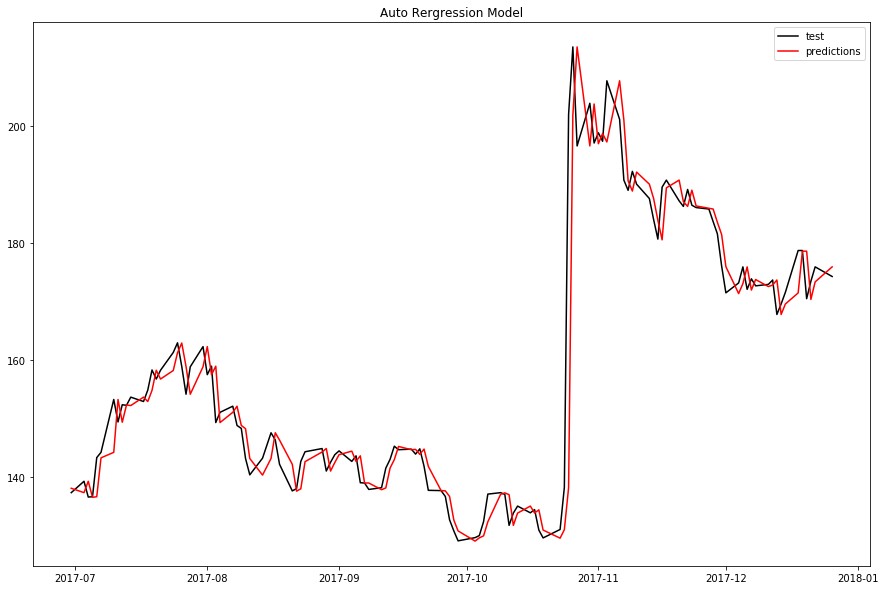

>predicted=138.033, expected=137.300
>predicted=137.289, expected=139.250
>predicted=139.236, expected=136.550
>predicted=136.550, expected=136.600
>predicted=136.593, expected=143.300
>predicted=143.286, expected=144.200
>predicted=144.187, expected=153.250
>predicted=153.236, expected=149.400
>predicted=149.383, expected=152.350
>predicted=151.739, expected=152.250
>predicted=152.220, expected=153.650
>predicted=152.517, expected=152.900
>predicted=152.848, expected=154.850
>predicted=153.359, expected=158.300
>predicted=157.593, expected=156.750
>predicted=155.018, expected=158.250
>predicted=157.154, expected=161.300
>predicted=159.325, expected=162.950
>predicted=161.544, expected=158.900
>predicted=156.834, expected=154.150
>predicted=152.609, expected=158.850
>predicted=156.624, expected=162.300
>predicted=160.494, expected=157.500
>predicted=155.204, expected=158.950
>predicted=157.071, expected=149.300
>predicted=147.107, expected=151.050
>predicted=149.234, expected=152.100
>

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=177.523, expected=178.750
>predicted=177.344, expected=170.500
>predicted=169.364, expected=173.500
>predicted=172.163, expected=175.950
>predicted=174.813, expected=174.300
Test Root Mean Squared Error: 7.262
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(0, 1)   Log Likelihood               -1410.470
Method:                       css-mle   S.D. of innovations             77.699
Date:                Mon, 22 Jan 2018   AIC                           2824.941
Time:                        10:15:42   BIC                           2831.935
Sample:                             0   HQIC                          2827.758
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

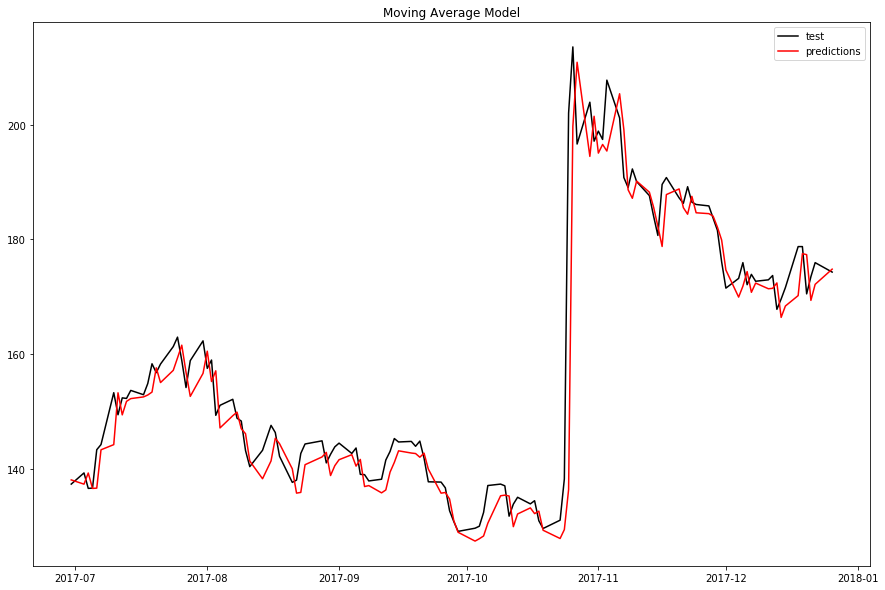

>predicted=135.455, expected=137.300
>predicted=134.737, expected=139.250
>predicted=136.619, expected=136.550
>predicted=134.001, expected=136.600
>predicted=134.056, expected=143.300
>predicted=140.452, expected=144.200
>predicted=141.341, expected=153.250
>predicted=150.169, expected=149.400
>predicted=146.255, expected=152.350
>predicted=149.214, expected=152.250
>predicted=149.129, expected=153.650
>predicted=150.562, expected=152.900
>predicted=149.815, expected=154.850
>predicted=151.809, expected=158.300
>predicted=155.350, expected=156.750
>predicted=153.764, expected=158.250
>predicted=155.330, expected=161.300
>predicted=158.506, expected=162.950
>predicted=160.259, expected=158.900
>predicted=156.012, expected=154.150
>predicted=151.093, expected=158.850
>predicted=155.872, expected=162.300
>predicted=159.460, expected=157.500
>predicted=154.436, expected=158.950
>predicted=155.948, expected=149.300
>predicted=145.927, expected=151.050
>predicted=147.671, expected=152.100
>

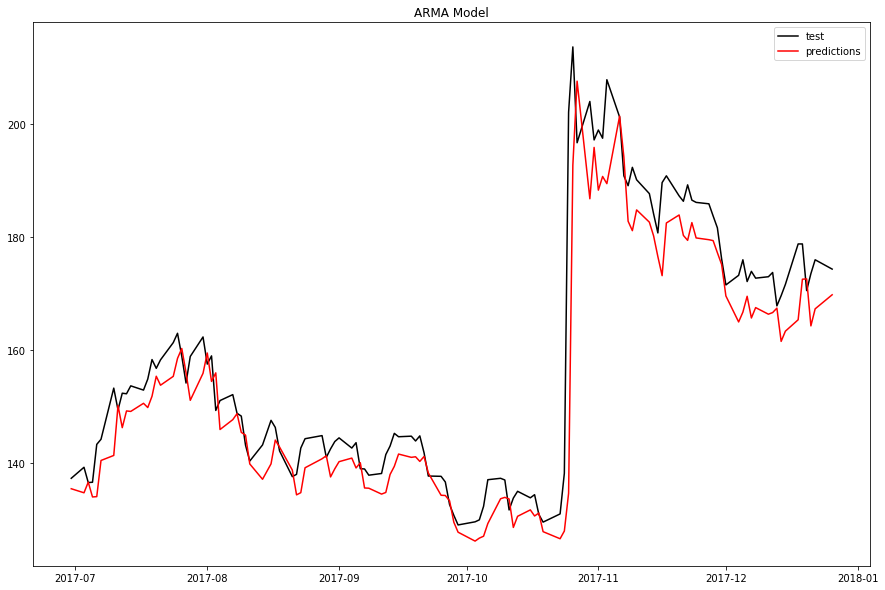

>predicted=138.094, expected=137.300
>predicted=137.280, expected=139.250
>predicted=139.300, expected=136.550
>predicted=136.493, expected=136.600
>predicted=136.601, expected=143.300
>predicted=143.439, expected=144.200
>predicted=144.221, expected=153.250
>predicted=153.509, expected=149.400
>predicted=149.404, expected=152.350
>predicted=152.322, expected=152.250
>predicted=152.251, expected=153.650
>predicted=153.635, expected=152.900
>predicted=152.908, expected=154.850
>predicted=154.826, expected=158.300
>predicted=158.271, expected=156.750
>predicted=156.770, expected=158.250
>predicted=158.228, expected=161.300
>predicted=161.263, expected=162.950
>predicted=162.935, expected=158.900
>predicted=158.955, expected=154.150
>predicted=154.138, expected=158.850
>predicted=158.788, expected=162.300
>predicted=162.289, expected=157.500
>predicted=157.570, expected=158.950
>predicted=158.923, expected=149.300
>predicted=149.553, expected=151.050
>predicted=150.990, expected=152.100
>

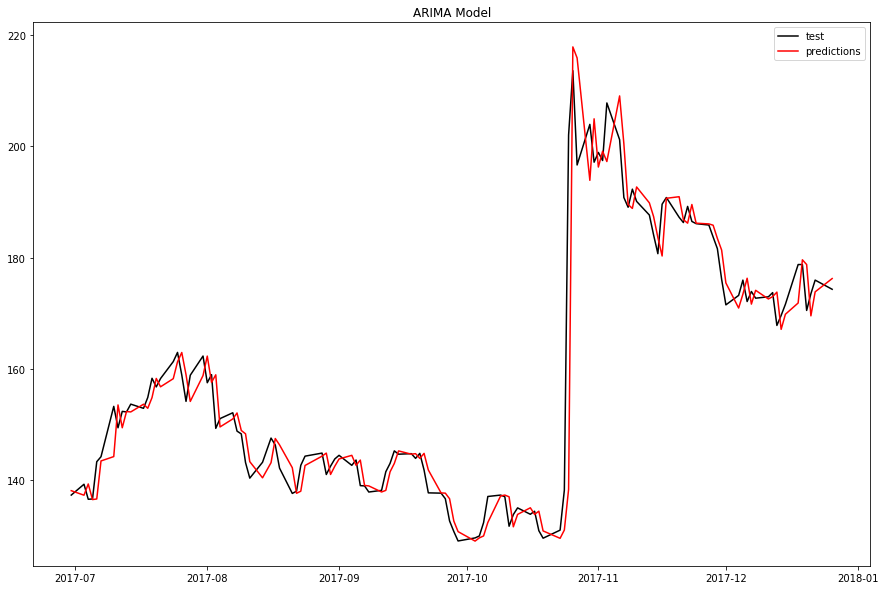

>predicted=272.450, expected=273.650
>predicted=273.622, expected=274.850
>predicted=274.822, expected=273.000
>predicted=272.972, expected=274.900
>predicted=274.900, expected=281.000
>predicted=281.000, expected=280.100
>predicted=280.100, expected=285.550
>predicted=285.550, expected=283.550
>predicted=283.550, expected=287.650
>predicted=287.650, expected=288.750
>predicted=288.722, expected=291.600
>predicted=291.573, expected=293.000
>predicted=293.000, expected=291.000
>predicted=290.973, expected=293.300
>predicted=293.273, expected=290.950
>predicted=290.950, expected=290.650
>predicted=290.650, expected=294.550
>predicted=294.523, expected=296.100
>predicted=296.100, expected=295.800
>predicted=295.774, expected=298.350
>predicted=298.324, expected=299.100
>predicted=299.100, expected=312.500
>predicted=312.500, expected=309.000
>predicted=309.000, expected=307.700
>predicted=307.700, expected=300.550
>predicted=300.521, expected=305.250
>predicted=305.250, expected=311.200
>

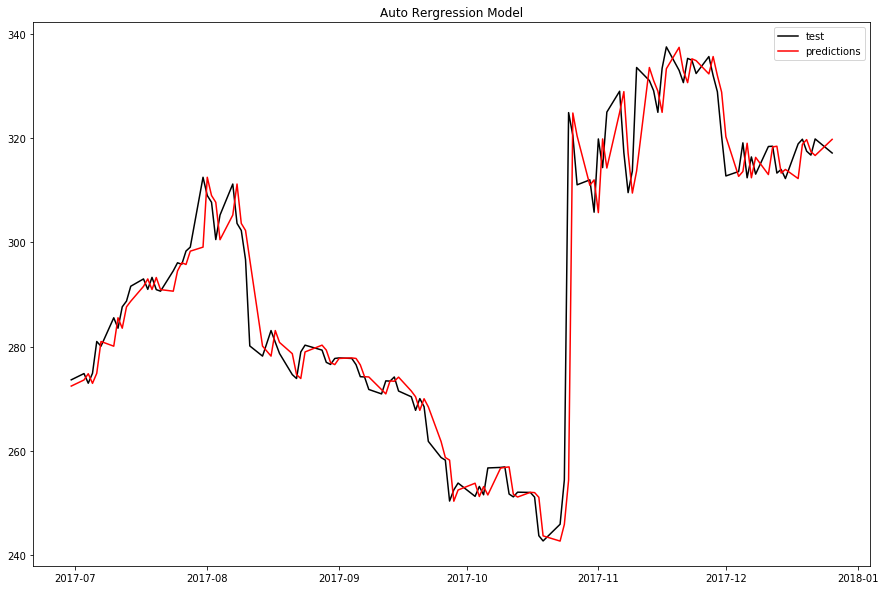

>predicted=272.417, expected=273.650
>predicted=273.632, expected=274.850
>predicted=274.838, expected=273.000
>predicted=272.987, expected=274.900


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=274.880, expected=281.000
>predicted=280.991, expected=280.100
>predicted=280.096, expected=285.550
>predicted=285.543, expected=283.550
>predicted=283.545, expected=287.650
>predicted=287.646, expected=288.750
>predicted=288.740, expected=291.600
>predicted=291.591, expected=293.000
>predicted=292.995, expected=291.000
>predicted=290.991, expected=293.300
>predicted=293.296, expected=290.950
>predicted=290.942, expected=290.650
>predicted=290.634, expected=294.550
>predicted=294.541, expected=296.100


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=296.074, expected=295.800
>predicted=295.796, expected=298.350
>predicted=298.334, expected=299.100
>predicted=299.088, expected=312.500
>predicted=312.492, expected=309.000
>predicted=308.999, expected=307.700
>predicted=307.680, expected=300.550
>predicted=300.549, expected=305.250
>predicted=305.238, expected=311.200
>predicted=311.175, expected=303.650
>predicted=303.615, expected=302.300
>predicted=302.283, expected=296.700
>predicted=296.688, expected=280.150
>predicted=280.138, expected=278.200
>predicted=278.195, expected=283.100
>predicted=283.078, expected=280.850
>predicted=280.849, expected=278.700
>predicted=278.681, expected=274.650
>predicted=274.636, expected=273.900
>predicted=273.875, expected=279.000
>predicted=278.999, expected=280.300
>predicted=280.279, expected=279.350
>predicted=279.335, expected=277.000
>predicted=276.991, expected=276.600
>predicted=276.587, expected=277.750
>predicted=277.739, expected=277.850
>predicted=277.840, expected=277.750
>

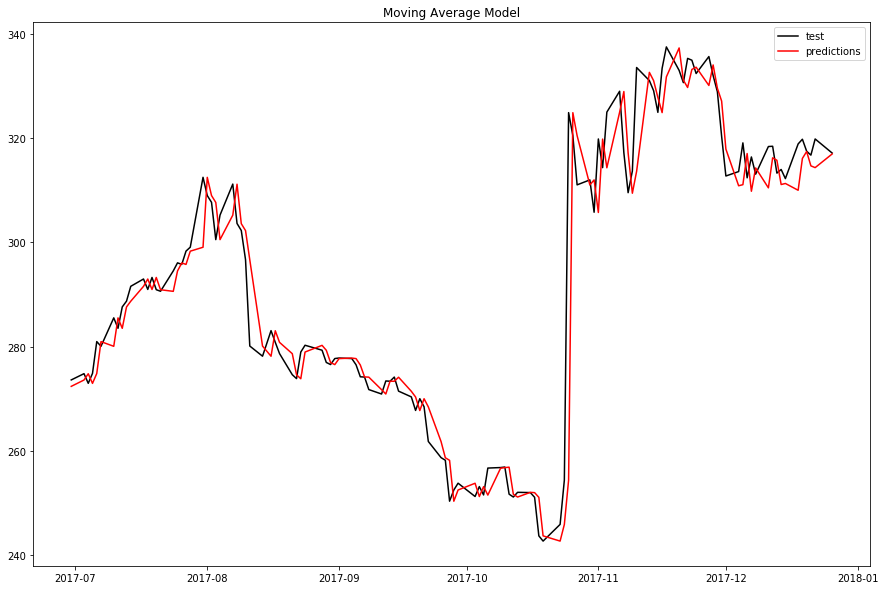

>predicted=266.413, expected=273.650
>predicted=267.581, expected=274.850
>predicted=268.757, expected=273.000
>predicted=266.961, expected=274.900
>predicted=268.805, expected=281.000
>predicted=274.723, expected=280.100
>predicted=273.834, expected=285.550
>predicted=279.299, expected=283.550
>predicted=277.248, expected=287.650
>predicted=281.464, expected=288.750
>predicted=282.659, expected=291.600
>predicted=285.705, expected=293.000
>predicted=287.256, expected=291.000
>predicted=285.141, expected=293.300
>predicted=287.638, expected=290.950
>predicted=285.142, expected=290.650
>predicted=284.866, expected=294.550
>predicted=289.037, expected=296.100
>predicted=290.767, expected=295.800
>predicted=290.496, expected=298.350
>predicted=293.310, expected=299.100
>predicted=294.190, expected=312.500
>predicted=308.562, expected=309.000
>predicted=304.665, expected=307.700
>predicted=303.278, expected=300.550
>predicted=295.247, expected=305.250
>predicted=300.419, expected=311.200
>

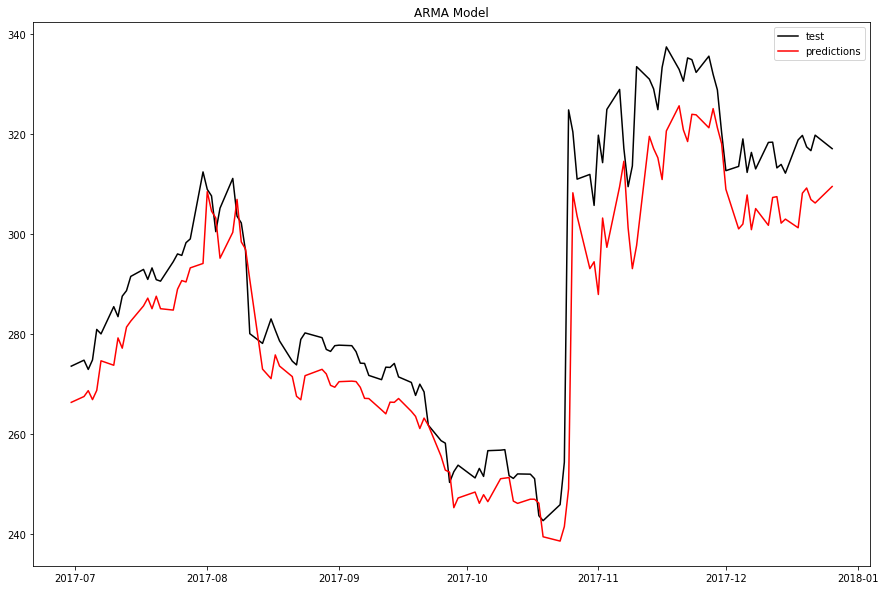

>predicted=272.528, expected=273.650
>predicted=273.624, expected=274.850
>predicted=274.824, expected=273.000
>predicted=273.042, expected=274.900
>predicted=274.853, expected=281.000
>predicted=280.886, expected=280.100
>predicted=280.120, expected=285.550
>predicted=285.409, expected=283.550
>predicted=283.615, expected=287.650
>predicted=287.498, expected=288.750
>predicted=288.711, expected=291.600
>predicted=291.503, expected=293.000
>predicted=292.954, expected=291.000
>predicted=291.068, expected=293.300
>predicted=293.216, expected=290.950
>predicted=291.042, expected=290.650
>predicted=290.661, expected=294.550
>predicted=294.397, expected=296.100
>predicted=296.043, expected=295.800
>predicted=295.811, expected=298.350
>predicted=298.253, expected=299.100
>predicted=299.072, expected=312.500
>predicted=312.034, expected=309.000
>predicted=309.202, expected=307.700
>predicted=307.770, expected=300.550
>predicted=300.887, expected=305.250
>predicted=304.961, expected=311.200
>

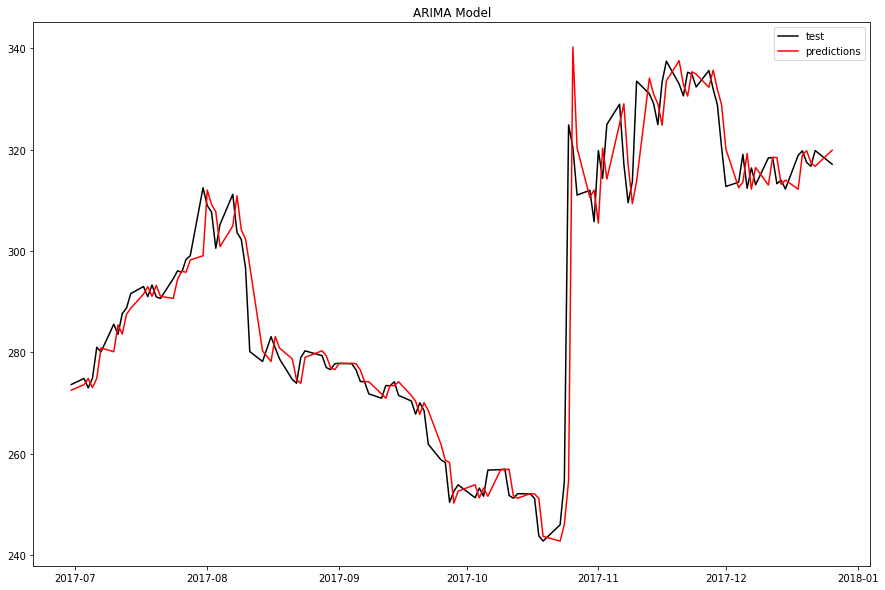

>predicted=1438.500, expected=1463.500
>predicted=1463.258, expected=1492.750
>predicted=1492.750, expected=1485.050
>predicted=1485.050, expected=1505.950
>predicted=1505.950, expected=1504.050
>predicted=1504.050, expected=1505.750
>predicted=1505.750, expected=1512.900
>predicted=1512.666, expected=1514.800
>predicted=1514.568, expected=1515.450
>predicted=1515.450, expected=1582.000
>predicted=1582.000, expected=1564.600
>predicted=1564.600, expected=1547.450
>predicted=1547.450, expected=1557.800
>predicted=1557.800, expected=1570.150
>predicted=1569.914, expected=1571.600
>predicted=1571.600, expected=1577.650
>predicted=1577.650, expected=1593.250
>predicted=1593.250, expected=1617.850
>predicted=1617.621, expected=1711.950
>predicted=1711.950, expected=1785.850
>predicted=1785.850, expected=1841.850
>predicted=1841.850, expected=1809.500
>predicted=1809.235, expected=1827.250
>predicted=1826.987, expected=1829.000
>predicted=1829.000, expected=1785.450
>predicted=1785.450, expe

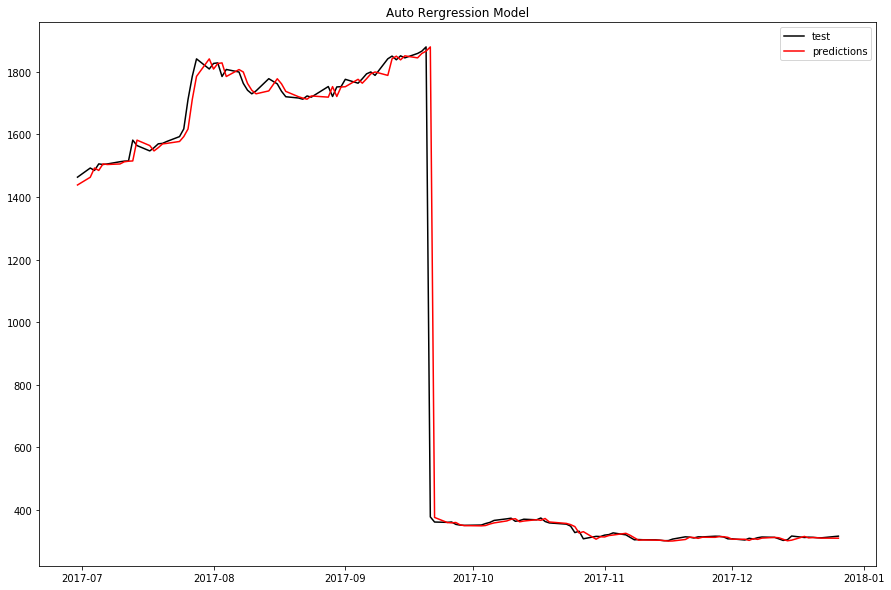

>predicted=1438.425, expected=1463.500
>predicted=1463.443, expected=1492.750
>predicted=1492.747, expected=1485.050
>predicted=1484.982, expected=1505.950
>predicted=1505.893, expected=1504.050
>predicted=1503.983, expected=1505.750
>predicted=1505.675, expected=1512.900
>predicted=1512.820, expected=1514.800
>predicted=1514.715, expected=1515.450
>predicted=1515.354, expected=1582.000
>predicted=1581.923, expected=1564.600
>predicted=1564.550, expected=1547.450
>predicted=1547.448, expected=1557.800
>predicted=1557.800, expected=1570.150
>predicted=1570.015, expected=1571.600
>predicted=1571.543, expected=1577.650
>predicted=1577.576, expected=1593.250
>predicted=1593.218, expected=1617.850
>predicted=1617.688, expected=1711.950
>predicted=1711.864, expected=1785.850
>predicted=1785.746, expected=1841.850
>predicted=1841.787, expected=1809.500
>predicted=1809.424, expected=1827.250
>predicted=1827.094, expected=1829.000
>predicted=1828.900, expected=1785.450
>predicted=1785.358, expe

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=1799.798, expected=1763.550
>predicted=1763.523, expected=1741.550
>predicted=1741.448, expected=1730.100
>predicted=1729.958, expected=1739.400
>predicted=1739.333, expected=1778.500
>predicted=1778.482, expected=1761.850
>predicted=1761.809, expected=1738.100
>predicted=1737.959, expected=1720.750
>predicted=1720.566, expected=1716.700
>predicted=1716.639, expected=1712.900
>predicted=1712.879, expected=1723.250
>predicted=1723.170, expected=1719.450
>predicted=1719.322, expected=1753.350
>predicted=1753.317, expected=1721.550
>predicted=1721.483, expected=1752.100
>predicted=1752.084, expected=1753.050
>predicted=1753.050, expected=1776.450
>predicted=1776.348, expected=1764.100
>predicted=1764.027, expected=1778.250
>predicted=1778.218, expected=1793.950
>predicted=1793.823, expected=1800.000
>predicted=1799.912, expected=1789.000
>predicted=1788.900, expected=1842.050
>predicted=1841.932, expected=1850.750
>predicted=1850.652, expected=1839.000
>predicted=1838.971, expe

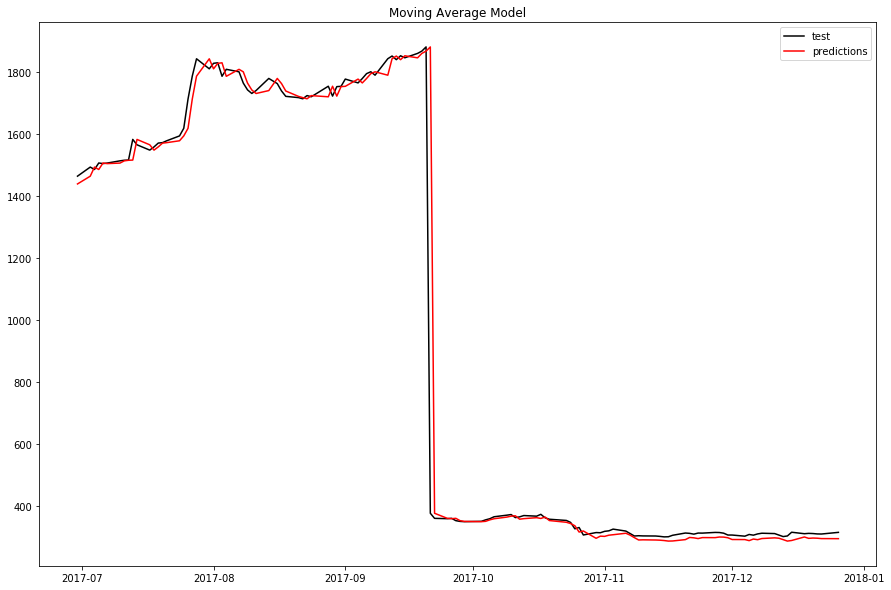

>predicted=1420.095, expected=1463.500
>predicted=1445.055, expected=1492.750
>predicted=1474.510, expected=1485.050
>predicted=1466.772, expected=1505.950
>predicted=1488.056, expected=1504.050
>predicted=1486.237, expected=1505.750
>predicted=1488.100, expected=1512.900
>predicted=1495.537, expected=1514.800
>predicted=1497.613, expected=1515.450
>predicted=1498.408, expected=1582.000
>predicted=1566.054, expected=1564.600
>predicted=1547.984, expected=1547.450
>predicted=1530.248, expected=1557.800
>predicted=1541.100, expected=1570.150
>predicted=1554.050, expected=1571.600
>predicted=1555.716, expected=1577.650
>predicted=1562.162, expected=1593.250
>predicted=1578.502, expected=1617.850
>predicted=1604.175, expected=1711.950
>predicted=1700.681, expected=1785.850
>predicted=1776.733, expected=1841.850
>predicted=1834.165, expected=1809.500
>predicted=1800.827, expected=1827.250
>predicted=1819.182, expected=1829.000
>predicted=1821.080, expected=1785.450
>predicted=1776.047, expe

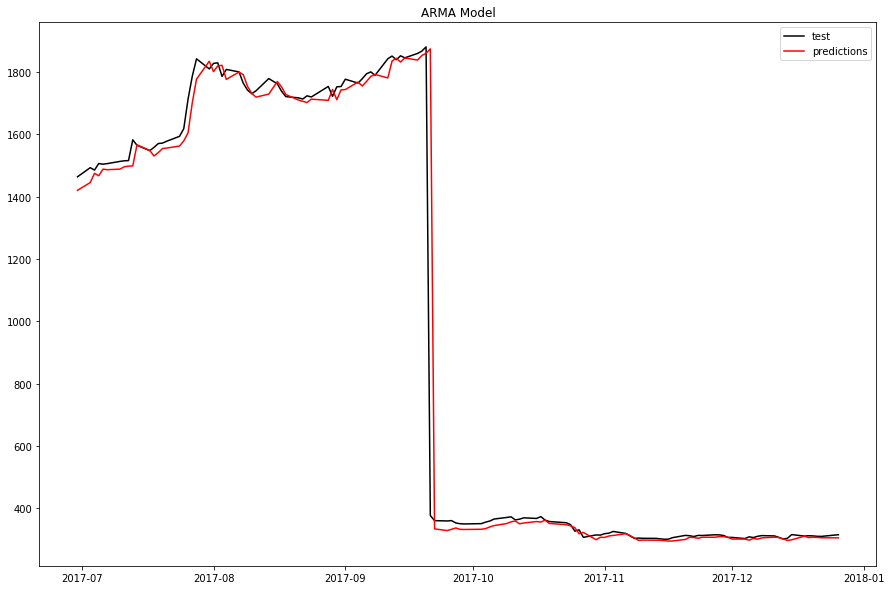

>predicted=1438.379, expected=1463.500
>predicted=1463.659, expected=1492.750
>predicted=1493.187, expected=1485.050
>predicted=1484.967, expected=1505.950
>predicted=1506.120, expected=1504.050
>predicted=1504.037, expected=1505.750
>predicted=1505.762, expected=1512.900
>predicted=1512.949, expected=1514.800
>predicted=1514.813, expected=1515.450
>predicted=1515.454, expected=1582.000
>predicted=1582.330, expected=1564.600
>predicted=1564.824, expected=1547.450
>predicted=1547.575, expected=1557.800
>predicted=1557.705, expected=1570.150
>predicted=1570.048, expected=1571.600
>predicted=1571.588, expected=1577.650
>predicted=1577.598, expected=1593.250
>predicted=1593.125, expected=1617.850
>predicted=1617.739, expected=1711.950
>predicted=1713.909, expected=1785.850
>predicted=1792.742, expected=1841.850
>predicted=1849.026, expected=1809.500
>predicted=1806.144, expected=1827.250
>predicted=1828.973, expected=1829.000
>predicted=1829.169, expected=1785.450
>predicted=1781.186, expe

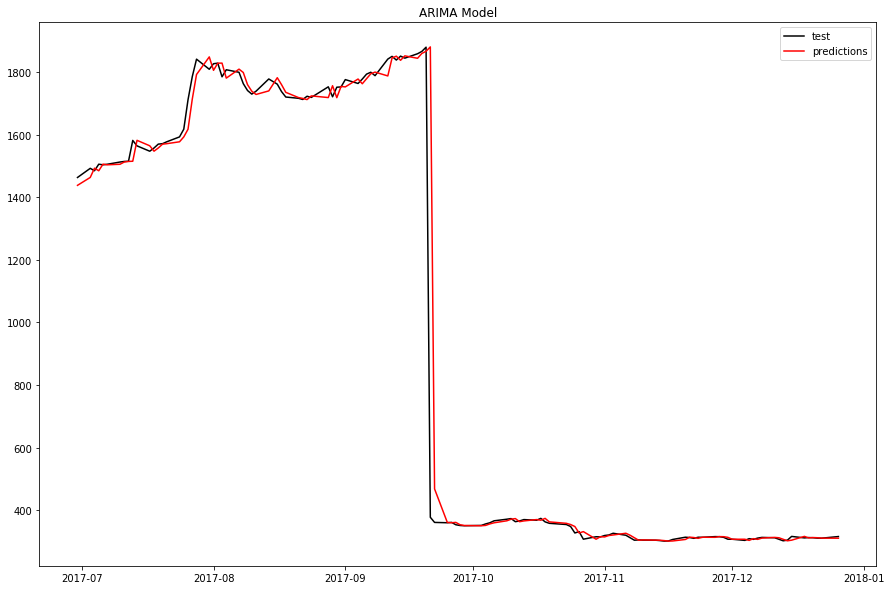

[8.842, 4.949, 5.739, 12.736, 1.832, 14.948, 5.154, 20.47, 11.124, 7.028, 8.023, 136.867]
[8.846, 4.948, 5.74, 12.741, 1.85, 14.955, 5.153, 20.464, 11.129, 7.262, 8.059, 137.095]
[39.05, 7.998, 6.58, 15.223, 1.897, 15.347, 12.927, 21.211, 11.808, 8.665, 12.353, 137.131]
[8.817, 4.992, 5.74, 13.422, 1.829, 14.912, 5.177, 20.41, 11.106, 7.044, 8.209, 137.286]


In [13]:
arm=[]
mam=[]
armam=[]
arimam=[]
armse=[]
mamse=[]
armamse=[]
arimamse=[]
for i in range(len(df1.columns)):
    autoreg(df1[keys[i]])
    arm.append('%.3f'%sqrt(ar_mse))
    movavg(df1[keys[i]])
    mam.append('%.3f'%sqrt(ma_mse))
    armamod(df1[keys[i]])
    armam.append('%.3f'%sqrt(arma_mse))
    arimamod(df1[keys[i]])
    arimam.append('%.3f'%sqrt(arima_mse))
for i in arm:
    armse.append(float(i))
print(armse)    
for i in mam:
    mamse.append(float(i))
print(mamse)   
for i in armam:
    armamse.append(float(i))
print(armamse)
for i in arimam:
    arimamse.append(float(i))
print(arimamse)

In [14]:
print(armse)
print(mamse)
print(armamse)
print(arimamse)

[8.842, 4.949, 5.739, 12.736, 1.832, 14.948, 5.154, 20.47, 11.124, 7.028, 8.023, 136.867]
[8.846, 4.948, 5.74, 12.741, 1.85, 14.955, 5.153, 20.464, 11.129, 7.262, 8.059, 137.095]
[39.05, 7.998, 6.58, 15.223, 1.897, 15.347, 12.927, 21.211, 11.808, 8.665, 12.353, 137.131]
[8.817, 4.992, 5.74, 13.422, 1.829, 14.912, 5.177, 20.41, 11.106, 7.044, 8.209, 137.286]


In [15]:
print('RMS Error Values of all Stocks by different models')
re=np.column_stack((armse,mamse,armamse,arimamse))
rt=pd.DataFrame(re)
rt.index=df1.keys()
rt.columns=list(['AR','MA','ARMA','ARIMA'])
rt

RMS Error Values of all Stocks by different models


AR       MA     ARMA    ARIMA
AXIS        8.842    8.846   39.050    8.817
BOB         4.949    4.948    7.998    4.992
BOI         5.739    5.740    6.580    5.740
CANBK      12.736   12.741   15.223   13.422
FEDBK       1.832    1.850    1.897    1.829
HDFC       14.948   14.955   15.347   14.912
ICICI       5.154    5.153   12.927    5.177
INDUSIND   20.470   20.464   21.211   20.410
KOTAK      11.124   11.129   11.808   11.106
PNB         7.028    7.262    8.665    7.044
SBI         8.023    8.059   12.353    8.209
YESBANK   136.867  137.095  137.131  137.286

In [26]:
returns = df1.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = len(df1)
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(df1.columns)-1, num_portfolios))
for i in range(num_portfolios):
    weights = np.array(np.random.uniform(-0.3,0.3,12)) 
    
    #calculate annualised portfolio return
    portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
    #calculate annualised portfolio volatility
    portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
 
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['returns','volatality','sharpe',df1.columns[0],df1.columns[1],df1.columns[2],
                                                df1.columns[3],df1.columns[4],df1.columns[5],df1.columns[6],df1.columns[7],
                                                df1.columns[8],df1.columns[9],df1.columns[10],df1.columns[11]])
results_frame

returns  volatality    sharpe      AXIS       BOB       BOI     CANBK  \
0       0.15        0.18  0.833333  0.157307 -0.289647 -0.288961  0.129318   
1       0.03        0.32  0.093750 -0.112683 -0.228096  0.121302 -0.177606   
2       0.73        0.50  1.460000 -0.000746  0.273599  0.258228  0.027032   
3       0.41        0.21  1.952381  0.123072  0.041796 -0.041025  0.029193   
4       0.01        0.11  0.090909 -0.070095 -0.223722 -0.146328  0.193115   
5       0.55        0.26  2.115385 -0.191388  0.238155  0.259107 -0.160752   
6      -0.28        0.36 -0.777778 -0.066736 -0.242262  0.129445 -0.150460   
7       0.18        0.14  1.285714 -0.270988 -0.011987  0.015516  0.132882   
8      -0.48        0.38 -1.263158  0.249180 -0.245998 -0.135123  0.038559   
9       0.31        0.31  1.000000  0.002841 -0.161543 -0.167004  0.214037   
10      0.21        0.12  1.750000  0.032861 -0.069036 -0.007876 -0.280793   
11     -0.16        0.18 -0.888889 -0.045100 -0.107222 -0.184146  0.209930   
12     -0.23        0.42 -0.547619 -0.225036 -0.003249 -0.289020 -0.262161   
13      0.42        0.21  2.000000  0.192248 -0.149079  0.295566  0.092562   
14      0.07        0.22  0.318182  0.295185 -0.223382  0.281374 -0.299332   
15      0.35        0.31  1.129032 -0.177506 -0.057533  0.175031  0.241942   
16      0.00        0.09  0.000000  0.287998 -0.117225 -0.036529  0.178841   
17     -0.30        0.28 -1.071429  0.058878 -0.288540 -0.184020  0.071007   
18      0.01        0.19  0.052632 -0.071136 -0.205773  0.180203  0.076240   
19      0.18        0.18  1.000000  0.148895  0.052970  0.075587 -0.200089   
20     -0.07        0.26 -0.269231 -0.147709 -0.282582 -0.165976  0.247961   
21      0.34        0.19  1.789474  0.251977 -0.065255  0.038170  0.197348   
22      0.02        0.13  0.153846  0.109307  0.257900 -0.167222 -0.274884   
23      0.08        0.28  0.285714  0.064956  0.265692  0.258610  0.134947   
24      0.18        0.24  0.750000  0.299852  0.126514  0.113427  0.175748   
25     -0.17        0.26 -0.653846 -0.276054 -0.207933 -0.112900  0.268836   
26     -0.12        0.11 -1.090909  0.134103 -0.241280 -0.053294 -0.070940   
27     -0.11        0.11 -1.000000  0.104722  0.279688 -0.166233 -0.260693   
28     -0.29        0.48 -0.604167  0.273682 -0.219159 -0.283189  0.009553   
29     -0.04        0.33 -0.121212 -0.057704  0.096975 -0.183611 -0.234701   
..       ...         ...       ...       ...       ...       ...       ...   
215     0.18        0.27  0.666667 -0.014442  0.202395 -0.196298 -0.080515   
216    -0.35        0.13 -2.692308 -0.248772 -0.153142 -0.091568 -0.220681   
217    -0.24        0.30 -0.800000 -0.166244 -0.256657  0.295403 -0.292115   
218    -0.44        0.27 -1.629630  0.261651 -0.115911 -0.186269 -0.275007   
219     0.16        0.23  0.695652 -0.291790  0.116858  0.232886  0.248549   
220     0.75        0.46  1.630435 -0.089909  0.093973  0.225896  0.260918   
221     0.21        0.22  0.954545  0.259943 -0.147346  0.024102  0.121542   
222    -0.25        0.20 -1.250000 -0.112999 -0.261027 -0.008072 -0.136635   
223     0.24        0.17  1.411765  0.105258 -0.194130  0.242150  0.037221   
224     0.08        0.14  0.571429 -0.029594 -0.051032 -0.181593 -0.012758   
225    -0.24        0.12 -2.000000  0.088258 -0.045791 -0.059171  0.245293   
226     0.05        0.21  0.238095  0.236108  0.195070 -0.261056  0.021886   
227     0.16        0.15  1.066667  0.102641 -0.086818  0.286774  0.159861   
228     0.20        0.18  1.111111  0.283885 -0.275380 -0.081003 -0.155239   
229    -0.48        0.39 -1.230769 -0.149742 -0.012793 -0.223716 -0.125579   
230    -0.29        0.18 -1.611111 -0.177190 -0.084288  0.062501  0.229185   
231     0.13        0.23  0.565217 -0.103946 -0.277265 -0.130651 -0.214357   
232    -0.10        0.38 -0.263158 -0.266496 -0.256814 -0.278707  0.052046   
233     0.09        0.25  0.360000  0.076417  0.258983 -0.015561  0.004683   
234     0.12        0.20  0

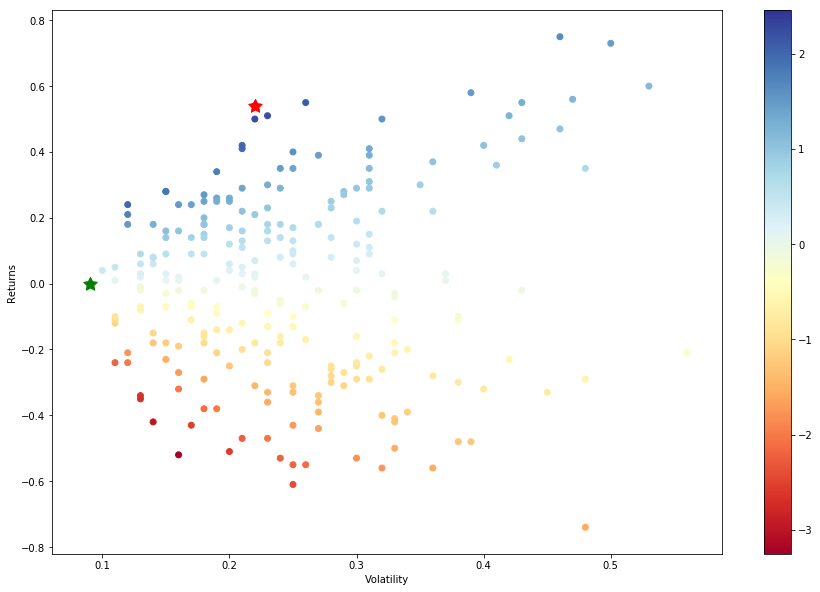

In [27]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['volatality'].idxmin()]
 
#create scatter plot coloured by Sharpe Ratio
pyplot.scatter(results_frame.volatality,results_frame.returns,c=results_frame.sharpe,cmap='RdYlBu')
pyplot.xlabel('Volatility')
pyplot.ylabel('Returns')
pyplot.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
pyplot.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=200)
#plot green star to highlight position of minimum variance portfolio
pyplot.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=200)
pyplot.show()

In [19]:
print(max_sharpe_port)
print(min_vol_port)

returns       0.510000
volatality    0.170000
sharpe        3.000000
AXIS          0.119241
BOB          -0.160070
BOI           0.117031
CANBK        -0.104933
FEDBK         0.130468
HDFC          0.281144
ICICI         0.170408
INDUSIND     -0.033614
KOTAK         0.190692
PNB           0.184005
SBI           0.076903
YESBANK      -0.110269
Name: 110, dtype: float64
returns       0.030000
volatality    0.090000
sharpe        0.333333
AXIS         -0.170917
BOB           0.068509
BOI          -0.092663
CANBK        -0.160066
FEDBK        -0.072870
HDFC          0.236534
ICICI        -0.056833
INDUSIND      0.120007
KOTAK        -0.050793
PNB           0.056750
SBI           0.193666
YESBANK      -0.015566
Name: 43, dtype: float64


In [90]:
x = df1.std()
y = df1.mean()
x = [i/max(x) for i in x]
y= [(i-np.mean(y))/max(y) for i in y]

In [91]:
shrat=[]
for i,j in zip(x,y):
    shrat.append(j/i)
ind=shrat.index(max(shrat))
print(shrat)
print('Best Sharpe Ratio belongs to',df1.columns[ind] )

[-1.4344145162268747, -10.294317357733537, -6.2601893695257695, -2.5189203385756906, -11.42102463379466, 1.6948435839716707, -6.0869824705859994, 1.9193753363832149, 1.1540855670607859, -8.1019048680102799, -4.8251899551860813, 0.37434391439089132]
Best Sharpe Ratio belongs to INDUSIND


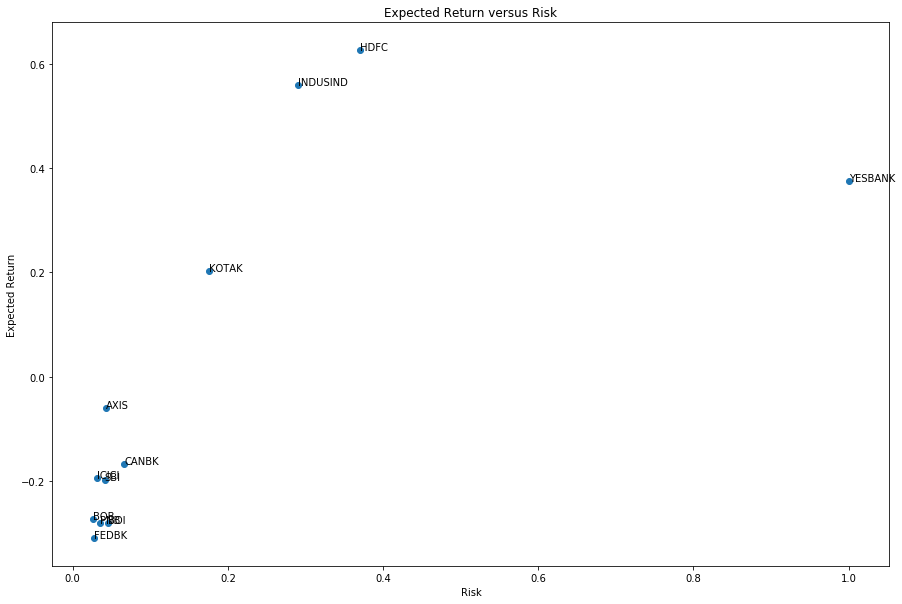

In [83]:
pyplot.scatter(x, y)
for index, symbol in enumerate(df1.columns):
    pyplot.annotate(symbol, (x[index], y[index]))

# Title and axis
#pyplot.ylim([-1,1])
pyplot.xlabel('Risk')
pyplot.ylabel('Expected Return')
pyplot.title('Expected Return versus Risk')
# Save the plot
pyplot.savefig('expected_return_vs_risk.png')
pyplot.show()